<font color='gray' size="10"> Lab 5: Unsupervised Learning II</font>

In [4]:
pip install torch

Note: you may need to restart the kernel to use updated packages.


<font size="5">Introduction </font>


The aim of this lab is to:
(i) **get more practice on coding with PyTorch** (ii)  **get experience with unsupervised learning methods like autoencoder and variational autoencoder**

- This lab constitutes the second part of coursework 2.
- A report answering only the <font color = 'red'>**questions in</font><font color = "maroon"> red**</font>.
  - For better appearance, use the "Light" theme in Google Colab
    - Menu --> Tools --> Setting --> Site --> Theme --> Light
- The report should be a separate file in **pdf format** (so **NOT** *doc, docx, notebook* etc.), well identified with your name, student number, assignment number, module code.



### **Turn on GPU support in CoLab. (1) Click "Runtime" in the top menu bar (2) Click "Change runtime type" (3) Under "Hardware accelerator", select "GPU" and save (4) You will see a warning message "You have connected to a new runtime. Would you like to terminate the previous runtime?", click "OK"**

# Section 1. PyTorch Fundamentals

## What is covered

| **Topic** | **Contents** |
| ----- | ----- |
| **Introduction to tensors** | Tensors are the basic building block of all of machine learning and deep learning. |
| **Creating tensors** | Tensors can represent almost any kind of data (images, words, tables of numbers). |
| **Getting information from tensors** | If you can put information into a tensor, you'll want to get it out too. |
| **Manipulating tensors** | Machine learning algorithms (like neural networks) involve manipulating tensors in many different ways such as adding, multiplying, combining. |
| **Dealing with tensor shapes** | One of the most common issues in machine learning is dealing with shape mismatches (trying to mixed wrong shaped tensors with other tensors). |
| **Indexing on tensors** | If you've indexed on a Python list or NumPy array, it's very similar with tensors, except they can have far more dimensions. |
| **Mixing PyTorch tensors and NumPy** | PyTorch plays with tensors ([`torch.Tensor`](https://pytorch.org/docs/stable/tensors.html)), NumPy likes arrays ([`np.ndarray`](https://numpy.org/doc/stable/reference/generated/numpy.ndarray.html)) sometimes you'll want to mix and match these. |
| **Reproducibility** | Machine learning is very experimental and since it uses a lot of *randomness* to work, sometimes you'll want that *randomness* to not be so random. |
| **Running tensors on GPU** | GPUs (Graphics Processing Units) make your code faster, PyTorch makes it easy to run your code on GPUs. |

## Importing PyTorch

Let's start by importing PyTorch and checking the version we're using.

In [5]:
import torch
torch.__version__

'2.2.2+cpu'

## Introduction to tensors

Now we've got PyTorch imported, it's time to learn about tensors.

Tensors are the fundamental building block of machine learning.

Their job is to represent data in a numerical way.

For example, you could represent an image as a tensor with shape `[3, 224, 224]` which would mean `[colour_channels, height, width]`, as in the image has `3` colour channels (red, green, blue), a height of `224` pixels and a width of `224` pixels.

![example of going from an input image to a tensor representation of the image, image gets broken down into 3 colour channels as well as numbers to represent the height and width](https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/images/00-tensor-shape-example-of-image.png)

In tensor-speak (the language used to describe tensors), the tensor would have three dimensions, one for `colour_channels`, `height` and `width`.

But we're getting ahead of ourselves.

Let's learn more about tensors by coding them.


### Creating tensors

PyTorch loves tensors. So much so there's a whole documentation page dedicated to the [`torch.Tensor`](https://pytorch.org/docs/stable/tensors.html) class.

Your first piece of homework is to [read through the documentation on `torch.Tensor`](https://pytorch.org/docs/stable/tensors.html) for 10-minutes. But you can get to that later.

Let's code.

The first thing we're going to create is a **scalar**.

A scalar is a single number and in tensor-speak it's a zero dimension tensor.

> **Note:** That's a trend for this course. We'll focus on writing specific code. But often I'll set exercises which involve reading and getting familiar with the PyTorch documentation. Because after all, once you're finished this course, you'll no doubt want to learn more. And the documentation is somewhere you'll be finding yourself quite often.

In [6]:
pip install torch

Note: you may need to restart the kernel to use updated packages.


In [7]:
# Scalar
scalar = torch.tensor(7)
scalar

tensor(7)

See how the above printed out `tensor(7)`?

That means although `scalar` is a single number, it's of type `torch.Tensor`.

We can check the dimensions of a tensor using the `ndim` attribute.

In [8]:
scalar.ndim

0

What if we wanted to retrieve the number from the tensor?

As in, turn it from `torch.Tensor` to a Python integer?

To do we can use the `item()` method.

In [9]:
# Get the Python number within a tensor (only works with one-element tensors)
scalar.item()

7

Okay, now let's see a **vector**.

A vector is a single dimension tensor but can contain many numbers.

As in, you could have a vector `[3, 2]` to describe `[bedrooms, bathrooms]` in your house. Or you could have `[3, 2, 2]` to describe `[bedrooms, bathrooms, car_parks]` in your house.

The important trend here is that a vector is flexible in what it can represent (the same with tensors).

In [10]:
# Vector
vector = torch.tensor([7, 7])
vector

tensor([7, 7])

How many dimensions do you think it'll have?

In [11]:
# Check the number of dimensions of vector
vector.ndim

1

Hmm, that's strange, `vector` contains two numbers but only has a single dimension.

I'll let you in on a trick.

You can tell the number of dimensions a tensor in PyTorch has by the number of square brackets on the outside (`[`) and you only need to count one side.

How many square brackets does `vector` have?

Another important concept for tensors is their `shape` attribute. The shape tells you how the elements inside them are arranged.

Let's check out the shape of `vector`.

In [12]:
# Check shape of vector
vector.shape

torch.Size([2])

The above returns `torch.Size([2])` which means our vector has a shape of `[2]`. This is because of the two elements we placed inside the square brackets (`[7, 7]`).

Let's now see a **matrix**.

In [13]:
# Matrix
MATRIX = torch.tensor([[7, 8],
                       [9, 10]])
MATRIX

tensor([[ 7,  8],
        [ 9, 10]])

Matrices are as flexible as vectors, except they've got an extra dimension.



In [14]:
# Check number of dimensions
MATRIX.ndim

2

`MATRIX` has two dimensions (did you count the number of square brakcets on the outside of one side?).

What `shape` do you think it will have?

In [15]:
MATRIX.shape

torch.Size([2, 2])

We get the output `torch.Size([2, 2])` because `MATRIX` is two elements deep and two elements wide.

How about we create a **tensor**?

In [16]:
# Tensor
TENSOR = torch.tensor([[[1, 2, 3],
                        [3, 6, 9],
                        [2, 4, 5]]])
TENSOR

tensor([[[1, 2, 3],
         [3, 6, 9],
         [2, 4, 5]]])

Tensors can represent almost anything. The one we just created could be the sales numbers for a steak and almond butter store (two of my favourite foods).

![a simple tensor in google sheets showing day of week, steak sales and almond butter sales](https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/images/00_simple_tensor.png)

How many dimensions do you think it has? (hint: use the square bracket counting trick)

In [17]:
# Check number of dimensions for TENSOR
TENSOR.ndim

3

And what about its shape?

In [18]:
# Check shape of TENSOR
TENSOR.shape

torch.Size([1, 3, 3])

Alright, it outputs `torch.Size([1, 3, 3])`.

The dimensions go outer to inner.

That means there's 1 dimension of 3 by 3.

![example of different tensor dimensions](https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/images/00-pytorch-different-tensor-dimensions.png)

> **Note:** You might've noticed me using lowercase letters for `scalar` and `vector` and uppercase letters for `MATRIX` and `TENSOR`. This was on purpose. In practice, you'll often see scalars and vectors denoted as lowercase letters such as `y` or `a`. And matrices and tensors denoted as uppercase letters such as `X` or `W`.
>
> You also might notice the names martrix and tensor used interchangably. This is common. Since in PyTorch you're often dealing with `torch.Tensor`'s (hence the tensor name), however, the shape and dimensions of what's inside will dictate what it actually is.

Let's summarise.

| Name | What is it? | Number of dimensions | Lower or upper (usually/example) |
| ----- | ----- | ----- | ----- |
| **scalar** | a single number | 0 | Lower (`a`) |
| **vector** | a number with direction (e.g. wind speed with direction) but can also have many other numbers | 1 | Lower (`y`) |
| **matrix** | a 2-dimensional array of numbers | 2 | Upper (`Q`) |
| **tensor** | an n-dimensional array of numbers | can be any number, a 0-dimension tensor is a scalar, a 1-dimension tensor is a vector | Upper (`X`) |

![scalar vector matrix tensor and what they look like](https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/images/00-scalar-vector-matrix-tensor.png)

### Random tensors

We've established tensors represent some form of data.

And machine learning models such as neural networks manipulate and seek patterns within tensors.

But when building machine learning models with PyTorch, it's rare you'll create tenors by hand (like what we've being doing).

Instead, a machine learning model often starts out with large random tensors of numbers and adjusts these random numbers as it works through data to better represent it.

In essence:

`Start with random numbers -> look at data -> update random numbers -> look at data -> update random numbers...`

As a data scientist, you can define how the machine learning model starts (initialization), looks at data (representation) and updates (optimization) its random numbers.

We'll get hands on with these steps later on.

For now, let's see how to create a tensor of random numbers.

We can do so using [`torch.rand()`](https://pytorch.org/docs/stable/generated/torch.rand.html) and passing in the `size` parameter.

In [19]:
# Create a random tensor of size (3, 4)
random_tensor = torch.rand(size=(3, 4))
random_tensor, random_tensor.dtype

(tensor([[0.7583, 0.0455, 0.1166, 0.2017],
         [0.5660, 0.9018, 0.1607, 0.9740],
         [0.4588, 0.0767, 0.7258, 0.9221]]),
 torch.float32)

The flexibility of `torch.rand()` is that we can adjust the `size` to be whatever we want.

For example, say you wanted a random tensor in the common image shape of `[224, 224, 3]` (`[height, width, color_channels`]).

In [20]:
# Create a random tensor of size (224, 224, 3)
random_image_size_tensor = torch.rand(size=(224, 224, 3))
random_image_size_tensor.shape, random_image_size_tensor.ndim

(torch.Size([224, 224, 3]), 3)

### Zeros and ones

Sometimes you'll just want to fill tensors with zeros or ones.

This happens a lot with masking (like masking some of the values in one tensor with zeros to let a model know not to learn them).

Let's create a tensor full of zeros with [`torch.zeros()`](https://pytorch.org/docs/stable/generated/torch.zeros.html)

Again, the `size` parameter comes into play.

In [21]:
# Create a tensor of all zeros
zeros = torch.zeros(size=(3, 4))
zeros, zeros.dtype

(tensor([[0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.]]),
 torch.float32)

We can do the same to create a tensor of all ones except using [`torch.ones()` ](https://pytorch.org/docs/stable/generated/torch.ones.html) instead.

In [22]:
# Create a tensor of all ones
ones = torch.ones(size=(3, 4))
ones, ones.dtype

(tensor([[1., 1., 1., 1.],
         [1., 1., 1., 1.],
         [1., 1., 1., 1.]]),
 torch.float32)

### Creating a range and tensors like

Sometimes you might want a range of numbers, such as 1 to 10 or 0 to 100.

You can use `torch.arange(start, end, step)` to do so.

Where:
* `start` = start of range (e.g. 0)
* `end` = end of range (e.g. 10)
* `step` = how many steps in between each value (e.g. 1)

In [23]:
# Create a range of values 0 to 10
zero_to_ten = torch.arange(start=0, end=10, step=1)
zero_to_ten

tensor([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

Sometimes you might want one tensor of a certain type with the same shape as another tensor.

For example, a tensor of all zeros with the same shape as a previous tensor.

To do so you can use [`torch.zeros_like(input)`](https://pytorch.org/docs/stable/generated/torch.zeros_like.html) or [`torch.ones_like(input)`](https://pytorch.org/docs/1.9.1/generated/torch.ones_like.html) which return a tensor filled with zeros or ones in the same shape as the `input` respectively.

In [24]:
# Can also create a tensor of zeros similar to another tensor
ten_zeros = torch.zeros_like(input=zero_to_ten) # will have same shape
ten_zeros

tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

### Tensor datatypes

There are many different [tensor datatypes available in PyTorch](https://pytorch.org/docs/stable/tensors.html#data-types).

Some are specific for CPU and some are better for GPU.

Getting to know which is which can take some time.

Generally if you see `torch.cuda` anywhere, the tensor is being used for GPU (since Nvidia GPUs use a computing toolkit called CUDA).

The most common type (and generally the default) is `torch.float32` or `torch.float`.

This is referred to as "32-bit floating point".

But there's also 16-bit floating point (`torch.float16` or `torch.half`) and 64-bit floating point (`torch.float64` or `torch.double`).

And to confuse things even more there's also 8-bit, 16-bit, 32-bit and 64-bit integers.

> **Note:** An integer is a flat round number like `7` whereas a float has a decimal `7.0`.

The reason for all of these is to do with **precision in computing**.

Precision is the amount of detail used to describe a number.

The higher the precision value (8, 16, 32), the more detail and hence data used to express a number.

This matters in deep learning and numerical computing because you're making so many operations, the more detail you have to calculate on, the more compute you have to use.

So lower precision datatypes are generally faster to compute on but sacrifice some performance on evaluation metrics like accuracy (faster to compute but less accurate).

> **Resources:**
  * See the [PyTorch documentation for a list of all available tensor datatypes](https://pytorch.org/docs/stable/tensors.html#data-types).
  * Read the [Wikipedia page for an overview of what precision in computing](https://en.wikipedia.org/wiki/Precision_(computer_science)) is.

Let's see how to create some tensors with specific datatypes. We can do so using the `dtype` parameter.

In [25]:
# Default datatype for tensors is float32
float_32_tensor = torch.tensor([3.0, 6.0, 9.0],
                               dtype=None, # defaults to None, which is torch.float32 or whatever datatype is passed
                               device=None, # defaults to None, which uses the default tensor type
                               requires_grad=False) # if True, operations perfromed on the tensor are recorded

float_32_tensor.shape, float_32_tensor.dtype, float_32_tensor.device

(torch.Size([3]), torch.float32, device(type='cpu'))

Aside from shape issues (tensor shapes don't match up), two of the other most common issues you'll come across in PyTorch are datatype and device issues.

For example, one of tensors is `torch.float32` and the other is `torch.float16` (PyTorch often likes tensors to be the same format).

Or one of your tensors is on the CPU and the other is on the GPU (PyTorch likes calculations between tensors to be on the same device).

We'll see more of this device talk later on.

For now let's create a tensor with `dtype=torch.float16`.

In [26]:
float_16_tensor = torch.tensor([3.0, 6.0, 9.0],
                               dtype=torch.float16) # torch.half would also work

float_16_tensor.dtype

torch.float16

## Getting information from tensors

Once you've created tensors (or someone else or a PyTorch module has created them for you), you might want to get some information from them.

We've seen these before but three of the most common attributes you'll want to find out about tensors are:
* `shape` - what shape is the tensor? (some operations require specific shape rules)
* `dtype` - what datatype are the elements within the tensor stored in?
* `device` - what device is the tensor stored on? (usually GPU or CPU)

Let's create a random tensor and find out details about it.

In [27]:
# Create a tensor
some_tensor = torch.rand(3, 4)

# Find out details about it
print(some_tensor)
print(f"Shape of tensor: {some_tensor.shape}")
print(f"Datatype of tensor: {some_tensor.dtype}")
print(f"Device tensor is stored on: {some_tensor.device}") # will default to CPU

tensor([[0.5632, 0.9182, 0.2708, 0.1597],
        [0.2172, 0.1457, 0.6578, 0.6347],
        [0.1530, 0.0275, 0.2799, 0.5485]])
Shape of tensor: torch.Size([3, 4])
Datatype of tensor: torch.float32
Device tensor is stored on: cpu


> **Note:** When you run into issues in PyTorch, it's very often one to do with one of the three attributes above. So when the error messages show up, sing yourself a little song called "what, what, where":
  * "*what shape are my tensors? what datatype are they and where are they stored? what shape, what datatype, where where where*"

## Manipulating tensors (tensor operations)

In deep learning, data (images, text, video, audio, protein structures, etc) gets represented as tensors.

A model learns by investigating those tensors and performing a series of operations (could be 1,000,000s+) on tensors to create a representation of the patterns in the input data.

These operations are often a wonderful dance between:
* Addition
* Substraction
* Multiplication (element-wise)
* Division
* Matrix multiplication

And that's it. Sure there are a few more here and there but these are the basic building blocks of neural networks.

Stacking these building blocks in the right way, you can create the most sophisticated of neural networks (just like lego!).

### Basic operations

Let's start with a few of the fundamental operations, addition (`+`), subtraction (`-`), mutliplication (`*`).

They work just as you think they would.

In [28]:
# Create a tensor of values and add a number to it
tensor = torch.tensor([1, 2, 3])
tensor + 10

tensor([11, 12, 13])

In [29]:
# Multiply it by 10
tensor * 10

tensor([10, 20, 30])

Notice how the tensor values above didn't end up being `tensor([110, 120, 130])`, this is because the values inside the tensor don't change unless they're reassigned.

In [30]:
# Tensors don't change unless reassigned
tensor

tensor([1, 2, 3])

Let's subtract a number and this time we'll reassign the `tensor` variable.

In [31]:
# Subtract and reassign
tensor = tensor - 10
tensor

tensor([-9, -8, -7])

In [32]:
# Add and reassign
tensor = tensor + 10
tensor

tensor([1, 2, 3])

PyTorch also has a bunch of built-in functions like [`torch.mul()`](https://pytorch.org/docs/stable/generated/torch.mul.html#torch.mul) (short for multiplcation) and [`torch.add()`](https://pytorch.org/docs/stable/generated/torch.add.html) to perform basic operations.

In [33]:
# Can also use torch functions
torch.multiply(tensor, 10)

tensor([10, 20, 30])

In [34]:
# Original tensor is still unchanged
tensor

tensor([1, 2, 3])

However, it's more common to use the operator symbols like `*` instead of `torch.mul()`

In [35]:
# Element-wise multiplication (each element multiplies its equivalent, index 0->0, 1->1, 2->2)
print(tensor, "*", tensor)
print("Equals:", tensor * tensor)

tensor([1, 2, 3]) * tensor([1, 2, 3])
Equals: tensor([1, 4, 9])


### Matrix multiplication

One of the most common operations in machine learning and deep learning algorithms (like neural networks) is [matrix multiplication](https://www.mathsisfun.com/algebra/matrix-multiplying.html).

PyTorch implements matrix multiplication functionality in the [`torch.matmul()`](https://pytorch.org/docs/stable/generated/torch.matmul.html) method.

The main two rules for matrix multiplication to remember are:
1. The **inner dimensions** must match:
  * `(3, 2) @ (3, 2)` won't work
  * `(2, 3) @ (3, 2)` will work
  * `(3, 2) @ (2, 3)` will work
2. The resulting matrix has the shape of the **outer dimensions**:
 * `(2, 3) @ (3, 2)` -> `(2, 2)`
 * `(3, 2) @ (2, 3)` -> `(3, 3)`

> **Note:** "`@`" in Python is the symbol for matrix multiplication.

> **Resource:** You can see all of the rules for matrix multiplication using `torch.matmul()` [in the PyTorch documentation](https://pytorch.org/docs/stable/generated/torch.matmul.html).

Let's create a tensor and perform element-wise multiplication and matrix multiplication on it.



In [36]:
tensor = torch.tensor([1, 2, 3])
tensor.shape

torch.Size([3])

The difference between element-wise multiplication and matrix multiplication is the addition of values.

For our `tensor` variable with values `[1, 2, 3]`:

| Operation | Calculation | Code |
| ----- | ----- | ----- |
| **Element-wise multiplication** | `[1*1, 2*2, 3*3]` = `[1, 4, 9]` | `tensor * tensor` |
| **Matrix multiplication** | `[1*1 + 2*2 + 3*3]` = `[14]` | `tensor.matmul(tensor)` |


In [37]:
# Element-wise matrix multiplication
tensor * tensor

tensor([1, 4, 9])

In [38]:
# Matrix multiplication
torch.matmul(tensor, tensor)

tensor(14)

In [39]:
# Can also use the "@" symbol for matrix multiplication, though not recommended
tensor @ tensor

tensor(14)

## One of the most common errors in deep learning (shape errors)

Because much of deep learning is multiplying and performing operations on matrices and matrices have a strict rule about what shapes and sizes can be combined, one of the most common errors you'll run into in deep learning is shape mismatches.

In [95]:
# Shapes need to be in the right way
tensor_A = torch.tensor([[1, 2],
                         [3, 4],
                         [5, 6]], dtype=torch.float32)

tensor_B = torch.tensor([[7, 10],
                         [8, 11],
                         [9, 12]], dtype=torch.float32)

torch.matmul(tensor_A, tensor_B) # (this will cause an error)

RuntimeError: mat1 and mat2 shapes cannot be multiplied (3x2 and 3x2)

We can make matrix multiplication work between `tensor_A` and `tensor_B` by making their inner dimensions match.

One of the ways to do this is with a **transpose** (switch the dimensions of a given tensor).

You can perform transposes in PyTorch using either:
* `torch.transpose(input, dim0, dim1)` - where `input` is the desired tensor to transpose and `dim0` and `dim1` are the dimensions to be swapped.
* `tensor.T` - where `tensor` is the desired tensor to transpose.

Let's try the latter.

In [ ]:
# View tensor_A and tensor_B
print(tensor_A)
print(tensor_B)

tensor([[1., 2.],
        [3., 4.],
        [5., 6.]])
tensor([[ 7., 10.],
        [ 8., 11.],
        [ 9., 12.]])


In [ ]:
# View tensor_A and tensor_B.T
print(tensor_A)
print(tensor_B.T)

tensor([[1., 2.],
        [3., 4.],
        [5., 6.]])
tensor([[ 7.,  8.,  9.],
        [10., 11., 12.]])


In [ ]:
# The operation works when tensor_B is transposed
print(f"Original shapes: tensor_A = {tensor_A.shape}, tensor_B = {tensor_B.shape}\n")
print(f"New shapes: tensor_A = {tensor_A.shape} (same as above), tensor_B.T = {tensor_B.T.shape}\n")
print(f"Multiplying: {tensor_A.shape} * {tensor_B.T.shape} <- inner dimensions match\n")
print("Output:\n")
output = torch.matmul(tensor_A, tensor_B.T)
print(output)
print(f"\nOutput shape: {output.shape}")

Original shapes: tensor_A = torch.Size([3, 2]), tensor_B = torch.Size([3, 2])

New shapes: tensor_A = torch.Size([3, 2]) (same as above), tensor_B.T = torch.Size([2, 3])

Multiplying: torch.Size([3, 2]) * torch.Size([2, 3]) <- inner dimensions match

Output:

tensor([[ 27.,  30.,  33.],
        [ 61.,  68.,  75.],
        [ 95., 106., 117.]])

Output shape: torch.Size([3, 3])


You can also use [`torch.mm()`](https://pytorch.org/docs/stable/generated/torch.mm.html) which is a short for `torch.matmul()`.

In [ ]:
# torch.mm is a shortcut for matmul
torch.mm(tensor_A, tensor_B.T)

tensor([[ 27.,  30.,  33.],
        [ 61.,  68.,  75.],
        [ 95., 106., 117.]])

Without the transpose, the rules of matrix mulitplication aren't fulfilled and we get an error like above.

How about a visual?

![visual demo of matrix multiplication](https://github.com/mrdbourke/pytorch-deep-learning/raw/main/images/00-matrix-multiply-crop.gif)

You can create your own matrix multiplication visuals like this at http://matrixmultiplication.xyz/.

> **Note:** A matrix multiplication like this is also referred to as the [**dot product**](https://www.mathsisfun.com/algebra/vectors-dot-product.html) of two matrices.



Neural networks are full of matrix multiplications and dot products.

The [`torch.nn.Linear()`](https://pytorch.org/docs/1.9.1/generated/torch.nn.Linear.html) module (we'll see this in action later on), also known as a feed-forward layer or fully connected layer, implements a matrix multiplication between an input `x` and a weights matrix `A`.

$$
y = x\cdot{A^T} + b
$$

Where:
* `x` is the input to the layer (deep learning is a stack of layers like `torch.nn.Linear()` and others on top of each other).
* `A` is the weights matrix created by the layer, this starts out as random numbers that get adjusted as a neural network learns to better represent patterns in the data (notice the "`T`", that's because the weights matrix gets transposed).
  * **Note:** You might also often see `W` or another letter like `X` used to showcase the weights matrix.
* `b` is the bias term used to slightly offset the weights and inputs.
* `y` is the output (a manipulation of the input in the hopes to discover patterns in it).

This is a linear function (you may have seen something like $y = mx+b$ in high school or elsewhere), and can be used to draw a straight line!

Let's play around with a linear layer.

Try changing the values of `in_features` and `out_features` below and see what happens.

Do you notice anything to do with the shapes?

In [ ]:
# Since the linear layer starts with a random weights matrix, let's make it reproducible (more on this later)
torch.manual_seed(42)
# This uses matrix multiplication
linear = torch.nn.Linear(in_features=2, # in_features = matches inner dimension of input
                         out_features=6) # out_features = describes outer value
x = tensor_A
output = linear(x)
print(f"Input shape: {x.shape}\n")
print(f"Output:\n{output}\n\nOutput shape: {output.shape}")

tensor([[1., 2.],
        [3., 4.],
        [5., 6.]])
tensor([[ 7.,  8.,  9.],
        [10., 11., 12.]])
Input shape: torch.Size([3, 2])

Output:
tensor([[2.2368, 1.2292, 0.4714, 0.3864, 0.1309, 0.9838],
        [4.4919, 2.1970, 0.4469, 0.5285, 0.3401, 2.4777],
        [6.7469, 3.1648, 0.4224, 0.6705, 0.5493, 3.9716]],
       grad_fn=<AddmmBackward0>)

Output shape: torch.Size([3, 6])


> **Question:** What happens if you change `in_features` from 2 to 3 above? Does it error? How could you change the shape of the input (`x`) to accomodate to the error? Hint: what did we have to do to `tensor_B` above?

### Finding the min, max, mean, sum, etc (aggregation)

Now we've seen a few ways to manipulate tensors, let's run through a few ways to aggregate them (go from more values to less values).

First we'll create a tensor and then find the max, min, mean and sum of it.





In [ ]:
# Create a tensor
x = torch.arange(0, 100, 10)
x

Now let's perform some aggregation.

In [ ]:
print(f"Minimum: {x.min()}")
print(f"Maximum: {x.max()}")
# print(f"Mean: {x.mean()}") # this will error
print(f"Mean: {x.type(torch.float32).mean()}") # won't work without float datatype
print(f"Sum: {x.sum()}")

> **Note:** You may find some methods such as `torch.mean()` require tensors to be in `torch.float32` (the most common) or another specific datatype, otherwise the operation will fail.

You can also do the same as above with `torch` methods.

In [ ]:
torch.max(x), torch.min(x), torch.mean(x.type(torch.float32)), torch.sum(x)

### Positional min/max

You can also find the index of a tensor where the max or minimum occurs with [`torch.argmax()`](https://pytorch.org/docs/stable/generated/torch.argmax.html) and [`torch.argmin()`](https://pytorch.org/docs/stable/generated/torch.argmin.html) respectively.

This is helpful incase you just want the position where the highest (or lowest) value is and not the actual value itself (we'll see this in a later section when using the [softmax activation function](https://pytorch.org/docs/stable/generated/torch.nn.Softmax.html)).

In [ ]:
# Create a tensor
tensor = torch.arange(10, 100, 10)
print(f"Tensor: {tensor}")

# Returns index of max and min values
print(f"Index where max value occurs: {tensor.argmax()}")
print(f"Index where min value occurs: {tensor.argmin()}")

### Change tensor datatype

As mentioned, a common issue with deep learning operations is having your tensors in different datatypes.

If one tensor is in `torch.float64` and another is in `torch.float32`, you might run into some errors.

But there's a fix.

You can change the datatypes of tensors using [`torch.Tensor.type(dtype=None)`](https://pytorch.org/docs/stable/generated/torch.Tensor.type.html) where the `dtype` parameter is the datatype you'd like to use.

First we'll create a tensor and check it's datatype (the default is `torch.float32`).

In [ ]:
# Create a tensor and check its datatype
tensor = torch.arange(10., 100., 10.)
tensor.dtype

torch.float32

Now we'll create another tensor the same as before but change its datatype to `torch.float16`.



In [ ]:
# Create a float16 tensor
tensor_float16 = tensor.type(torch.float16)
tensor_float16

tensor([10., 20., 30., 40., 50., 60., 70., 80., 90.], dtype=torch.float16)

And we can do something similar to make a `torch.int8` tensor.

In [ ]:
# Create a int8 tensor
tensor_int8 = tensor.type(torch.int8)
tensor_int8

tensor([10, 20, 30, 40, 50, 60, 70, 80, 90], dtype=torch.int8)

> **Note:** Different datatypes can be confusing to begin with. But think of it like this, the lower the number (e.g. 32, 16, 8), the less precise a computer stores the value. And with a lower amount of storage, this generally results in faster computation and a smaller overall model. Mobile-based neural networks often operate with 8-bit integers, smaller and faster to run but less accurate than their float32 counterparts. For more on this, I'd read up about [precision in computing](https://en.wikipedia.org/wiki/Precision_(computer_science)).

### Reshaping, stacking, squeezing and unsqueezing

Often times you'll want to reshape or change the dimensions of your tensors without actually changing the values inside them.

To do so, some popular methods are:

| Method | One-line description |
| ----- | ----- |
| [`torch.reshape(input, shape)`](https://pytorch.org/docs/stable/generated/torch.reshape.html#torch.reshape) | Reshapes `input` to `shape` (if compatible), can also use `torch.Tensor.reshape()`. |
| [`torch.Tensor.view(shape)`](https://pytorch.org/docs/stable/generated/torch.Tensor.view.html) | Returns a view of the original tensor in a different `shape` but shares the same data as the original tensor. |
| [`torch.stack(tensors, dim=0)`](https://pytorch.org/docs/1.9.1/generated/torch.stack.html) | Concatenates a sequence of `tensors` along a new dimension (`dim`), all `tensors` must be same size. |
| [`torch.squeeze(input)`](https://pytorch.org/docs/stable/generated/torch.squeeze.html) | Squeezes `input` to remove all the dimenions with value `1`. |
| [`torch.unsqueeze(input, dim)`](https://pytorch.org/docs/1.9.1/generated/torch.unsqueeze.html) | Returns `input` with a dimension value of `1` added at `dim`. |
| [`torch.permute(input, dims)`](https://pytorch.org/docs/stable/generated/torch.permute.html) | Returns a *view* of the original `input` with its dimensions permuted (rearranged) to `dims`. |

Why do any of these?

Because deep learning models (neural networks) are all about manipulating tensors in some way. And because of the rules of matrix multiplication, if you've got shape mismatches, you'll run into errors. These methods help you make the right elements of your tensors are mixing with the right elements of other tensors.

Let's try them out.

First, we'll create a tensor.

In [ ]:
# Create a tensor
x = torch.arange(1., 8.)
x, x.shape

(tensor([1., 2., 3., 4., 5., 6., 7.]), torch.Size([7]))

Now let's add an extra dimension with `torch.reshape()`.

In [ ]:
# Add an extra dimension
x_reshaped = x.reshape(1, 7)
x_reshaped, x_reshaped.shape

(tensor([[1., 2., 3., 4., 5., 6., 7.]]), torch.Size([1, 7]))

We can also change the view with `torch.view()`.

In [ ]:
# Change view (keeps same data as original but changes view)
# See more: https://stackoverflow.com/a/54507446/7900723
z = x.view(1, 7)
z, z.shape

(tensor([[1., 2., 3., 4., 5., 6., 7.]]), torch.Size([1, 7]))

Remember though, changing the view of a tensor with `torch.view()` really only creates a new view of the *same* tensor.

So changing the view changes the original tensor too.

In [ ]:
# Changing z changes x
z[:, 0] = 5
z, x

(tensor([[5., 2., 3., 4., 5., 6., 7.]]), tensor([5., 2., 3., 4., 5., 6., 7.]))

If we wanted to stack our new tensor on top of itself five times, we could do so with `torch.stack()`.

In [ ]:
# Stack tensors on top of each other
x_stacked = torch.stack([x, x, x, x], dim=0) # try changing dim to dim=1 and see what happens
x_stacked

tensor([[5., 2., 3., 4., 5., 6., 7.],
        [5., 2., 3., 4., 5., 6., 7.],
        [5., 2., 3., 4., 5., 6., 7.],
        [5., 2., 3., 4., 5., 6., 7.]])

How about removing all single dimensions from a tensor?

To do so you can use `torch.squeeze()` (I remember this as *squeezing* the tensor to only have dimensions over 1).

In [ ]:
print(f"Previous tensor: {x_reshaped}")
print(f"Previous shape: {x_reshaped.shape}")

# Remove extra dimension from x_reshaped
x_squeezed = x_reshaped.squeeze()
print(f"\nNew tensor: {x_squeezed}")
print(f"New shape: {x_squeezed.shape}")

Previous tensor: tensor([[5., 2., 3., 4., 5., 6., 7.]])
Previous shape: torch.Size([1, 7])

New tensor: tensor([5., 2., 3., 4., 5., 6., 7.])
New shape: torch.Size([7])


And to do the reverse of `torch.squeeze()` you can use `torch.unsqueeze()` to add a dimension value of 1 at a specific index.

In [ ]:
print(f"Previous tensor: {x_squeezed}")
print(f"Previous shape: {x_squeezed.shape}")

## Add an extra dimension with unsqueeze
x_unsqueezed = x_squeezed.unsqueeze(dim=0)
print(f"\nNew tensor: {x_unsqueezed}")
print(f"New shape: {x_unsqueezed.shape}")

Previous tensor: tensor([5., 2., 3., 4., 5., 6., 7.])
Previous shape: torch.Size([7])

New tensor: tensor([[5., 2., 3., 4., 5., 6., 7.]])
New shape: torch.Size([1, 7])


You can also rearrange the order of axes values with `torch.permute(input, dims)`, where the `input` gets turned into a *view* with new `dims`.

In [ ]:
# Create tensor with specific shape
x_original = torch.rand(size=(224, 224, 3))

# Permute the original tensor to rearrange the axis order
x_permuted = x_original.permute(2, 0, 1) # shifts axis 0->1, 1->2, 2->0

print(f"Previous shape: {x_original.shape}")
print(f"New shape: {x_permuted.shape}")

Previous shape: torch.Size([224, 224, 3])
New shape: torch.Size([3, 224, 224])


> **Note**: Because permuting returns a *view* (shares the same data as the original), the values in the permuted tensor will be the same as the original tensor and if you change the values in the view, it will change the values of the original.

## Indexing (selecting data from tensors)

Sometimes you'll want to select specific data from tensors (for example, only the first column or second row).

To do so, you can use indexing.

If you've ever done indexing on Python lists or NumPy arrays, indexing in PyTorch with tensors is very similar.

In [ ]:
# Create a tensor
x = torch.arange(1, 10).reshape(1, 3, 3)
x, x.shape

(tensor([[[1, 2, 3],
          [4, 5, 6],
          [7, 8, 9]]]),
 torch.Size([1, 3, 3]))

Indexing values goes outer dimension -> inner dimension (check out the square brackets).

In [ ]:
# Let's index bracket by bracket
print(f"First square bracket:\n{x[0]}")
print(f"Second square bracket: {x[0][0]}")
print(f"Third square bracket: {x[0][0][0]}")

First square bracket:
tensor([[1, 2, 3],
        [4, 5, 6],
        [7, 8, 9]])
Second square bracket: tensor([1, 2, 3])
Third square bracket: 1


You can also use `:` to specify "all values in this dimension" and then use a comma (`,`) to add another dimension.

In [ ]:
# Get all values of 0th dimension and the 0 index of 1st dimension
x[:, 0]

tensor([[1, 2, 3]])

In [ ]:
# Get all values of 0th & 1st dimensions but only index 1 of 2nd dimension
x[:, :, 1]

tensor([[2, 5, 8]])

In [ ]:
# Get all values of the 0 dimension but only the 1 index value of the 1st and 2nd dimension
x[:, 1, 1]

tensor([5])

In [ ]:
# Get index 0 of 0th and 1st dimension and all values of 2nd dimension
x[0, 0, :] # same as x[0][0]

tensor([1, 2, 3])

Indexing can be quite confusing to begin with, especially with larger tensors (I still have to try indexing multiple times to get it right). But with a bit of practice and following the data explorer's motto (***visualize, visualize, visualize***), you'll start to get the hang of it.

## PyTorch tensors & NumPy

Since NumPy is a popular Python numerical computing library, PyTorch has functionality to interact with it nicely.  

The two main methods you'll want to use for NumPy to PyTorch (and back again) are:
* [`torch.from_numpy(ndarray)`](https://pytorch.org/docs/stable/generated/torch.from_numpy.html) - NumPy array -> PyTorch tensor.
* [`torch.Tensor.numpy()`](https://pytorch.org/docs/stable/generated/torch.Tensor.numpy.html) - PyTorch tensor -> NumPy array.

Let's try them out.

In [ ]:
import numpy as np

In [ ]:
# NumPy array to tensor
array = np.arange(1.0, 8.0)
tensor = torch.from_numpy(array)
array, tensor

(array([1., 2., 3., 4., 5., 6., 7.]),
 tensor([1., 2., 3., 4., 5., 6., 7.], dtype=torch.float64))

> **Note:** By default, NumPy arrays are created with the datatype `float64` and if you convert it to a PyTorch tensor, it'll keep the same datatype (as above).
>
> However, many PyTorch calculations default to using `float32`.
>
> So if you want to convert your NumPy array (float64) -> PyTorch tensor (float64) -> PyTorch tensor (float32), you can use `tensor = torch.from_numpy(array).type(torch.float32)`.

Because we reassigned `tensor` above, if you change the tensor, the array stays the same.

In [ ]:
# Change the array, keep the tensor
array = array + 1
array, tensor

(array([2., 3., 4., 5., 6., 7., 8.]),
 tensor([1., 2., 3., 4., 5., 6., 7.], dtype=torch.float64))

And if you want to go from PyTorch tensor to NumPy array, you can call `tensor.numpy()`.

In [ ]:
# Tensor to NumPy array
tensor = torch.ones(7) # create a tensor of ones with dtype=float32
numpy_tensor = tensor.numpy() # will be dtype=float32 unless changed
tensor, numpy_tensor

(tensor([1., 1., 1., 1., 1., 1., 1.]),
 array([1., 1., 1., 1., 1., 1., 1.], dtype=float32))

And the same rule applies as above, if you change the original `tensor`, the new `numpy_tensor` stays the same.

In [ ]:
# Change the tensor, keep the array the same
tensor = tensor + 1
tensor, numpy_tensor

(tensor([2., 2., 2., 2., 2., 2., 2.]),
 array([1., 1., 1., 1., 1., 1., 1.], dtype=float32))

## Reproducibility (trying to take the random out of random)

As you learn more about neural networks and machine learning, you'll start to discover how much randomness plays a part.

Well, pseudorandomness that is. Because after all, as they're designed, a computer is fundamentally deterministic (each step is predictable) so the randomness they create are simulated randomness (though there is debate on this too, but since I'm not a computer scientist, I'll let you find out more yourself).

How does this relate to neural networks and deep learning then?

We've discussed neural networks start with random numbers to describe patterns in data (these numbers are poor descriptions) and try to improve those random numbers using tensor operations (and a few other things we haven't discussed yet) to better describe patterns in data.

In short:

``start with random numbers -> tensor operations -> try to make better (again and again and again)``

Although randomness is nice and powerful, sometimes you'd like there to be a little less randomness.

Why?

So you can perform repeatable experiments.

For example, you create an algorithm capable of achieving X performance.

And then your friend tries it out to verify you're not crazy.

How could they do such a thing?

That's where **reproducibility** comes in.

In other words, can you get the same (or very similar) results on your computer running the same code as I get on mine?

Let's see a brief example of reproducibility in PyTorch.

We'll start by creating two random tensors, since they're random, you'd expect them to be different right?

In [ ]:
# Create two random tensors
random_tensor_A = torch.rand(3, 4)
random_tensor_B = torch.rand(3, 4)

print(f"Tensor A:\n{random_tensor_A}\n")
print(f"Tensor B:\n{random_tensor_B}\n")
print(f"Does Tensor A equal Tensor B? (anywhere)")
random_tensor_A == random_tensor_B

Tensor A:
tensor([[0.8016, 0.3649, 0.6286, 0.9663],
        [0.7687, 0.4566, 0.5745, 0.9200],
        [0.3230, 0.8613, 0.0919, 0.3102]])

Tensor B:
tensor([[0.9536, 0.6002, 0.0351, 0.6826],
        [0.3743, 0.5220, 0.1336, 0.9666],
        [0.9754, 0.8474, 0.8988, 0.1105]])

Does Tensor A equal Tensor B? (anywhere)


tensor([[False, False, False, False],
        [False, False, False, False],
        [False, False, False, False]])

Just as you might've expected, the tensors come out with different values.

But what if you wanted to created two random tensors with the *same* values.

As in, the tensors would still contain random values but they would be of the same flavour.

That's where [`torch.manual_seed(seed)`](https://pytorch.org/docs/stable/generated/torch.manual_seed.html) comes in, where `seed` is an integer (like `0` but it could be anything) that flavours the randomness.

Let's try it out by creating some more *flavoured* random tensors.

In [ ]:
# # Set the random seed
RANDOM_SEED=0 # try changing this to different values and see what happens to the numbers below
torch.manual_seed(seed=RANDOM_SEED)
random_tensor_C = torch.rand(3, 4)

# Have to reset the seed every time a new rand() is called
# Without this, tensor_D would be different to tensor_C
torch.random.manual_seed(seed=RANDOM_SEED) # try commenting this line out and seeing what happens
random_tensor_D = torch.rand(3, 4)

print(f"Tensor C:\n{random_tensor_C}\n")
print(f"Tensor D:\n{random_tensor_D}\n")
print(f"Does Tensor C equal Tensor D? (anywhere)")
random_tensor_C == random_tensor_D

Tensor C:
tensor([[0.4963, 0.7682, 0.0885, 0.1320],
        [0.3074, 0.6341, 0.4901, 0.8964],
        [0.4556, 0.6323, 0.3489, 0.4017]])

Tensor D:
tensor([[0.4963, 0.7682, 0.0885, 0.1320],
        [0.3074, 0.6341, 0.4901, 0.8964],
        [0.4556, 0.6323, 0.3489, 0.4017]])

Does Tensor C equal Tensor D? (anywhere)


tensor([[True, True, True, True],
        [True, True, True, True],
        [True, True, True, True]])

> **Resource:** What we've just covered only scratches the surface of reproducibility in PyTorch. For more, on reproducbility in general and random seeds, I'd checkout:
> * [The PyTorch reproducibility documentation](https://pytorch.org/docs/stable/notes/randomness.html) (a good exericse would be to read through this for 10-minutes and even if you don't understand it now, being aware of it is important).
> * [The Wikipedia random seed page](https://en.wikipedia.org/wiki/Random_seed) (this'll give a good overview of random seeds and pseudorandomness in general).

## Running tensors on GPUs (and making faster computations)

Deep learning algorithms require a lot of numerical operations.

And by default these operations are often done on a CPU (computer processing unit).

However, there's another common piece of hardware called a GPU (graphics processing unit), which is often much faster at performing the specific types of operations neural networks need (matrix multiplications) than CPUs.

Your computer might have one.

If so, you should look to use it whenever you can to train neural networks because chances are it'll speed up the training time dramatically.

There are a few ways to first get access to a GPU and secondly get PyTorch to use the GPU.

> **Note:** When I reference "GPU" throughout this course, I'm referencing a [Nvidia GPU with CUDA](https://developer.nvidia.com/cuda-gpus) enabled (CUDA is a computing platform and API that helps allow GPUs be used for general purpose computing & not just graphics) unless otherwise specified.





### 2. Getting PyTorch to run on the GPU

Once you've got a GPU ready to access, the next step is getting PyTorch to use for storing data (tensors) and computing on data (performing operations on tensors).

To do so, you can use the [`torch.cuda`](https://pytorch.org/docs/stable/cuda.html) package.

Rather than talk about it, let's try it out.

You can test if PyTorch has access to a GPU using [`torch.cuda.is_available()`](https://pytorch.org/docs/stable/generated/torch.cuda.is_available.html#torch.cuda.is_available).


In [ ]:
# Check for GPU
torch.cuda.is_available()

True

If the above outputs `True`, PyTorch can see and use the GPU, if it outputs `False`, it can't see the GPU and in that case, you'll have to if check the GPU support is turned on (guideline can be found in the very top of this notebook).

Now, let's say you wanted to setup your code so it ran on CPU *or* the GPU if it was available.

That way, if you or someone decides to run your code, it'll work regardless of the computing device they're using.

Let's create a `device` variable to store what kind of device is available.

In [ ]:
# Set device type
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

If the above output `"cuda"` it means we can set all of our PyTorch code to use the available CUDA device (a GPU) and if it output `"cpu"`, our PyTorch code will stick with the CPU.

> **Note:** In PyTorch, it's best practice to write [**device agnostic code**](https://pytorch.org/docs/master/notes/cuda.html#device-agnostic-code). This means code that'll run on CPU (always available) or GPU (if available).

If you want to do faster computing you can use a GPU but if you want to do *much* faster computing, you can use multiple GPUs.

You can count the number of GPUs PyTorch has access to using [`torch.cuda.device_count()`](https://pytorch.org/docs/stable/generated/torch.cuda.device_count.html#torch.cuda.device_count).

In [ ]:
# Count number of devices
torch.cuda.device_count()

1

Knowing the number of GPUs PyTorch has access to is helpful incase you wanted to run a specific process on one GPU and another process on another (PyTorch also has features to let you run a process across *all* GPUs).

### 3. Putting tensors (and models) on the GPU

You can put tensors (and models, we'll see this later) on a specific device by calling [`to(device)`](https://pytorch.org/docs/stable/generated/torch.Tensor.to.html) on them. Where `device` is the target device you'd like the tensor (or model) to go to.

Why do this?

GPUs offer far faster numerical computing than CPUs do and if a GPU isn't available, because of our **device agnostic code** (see above), it'll run on the CPU.

> **Note:** Putting a tensor on GPU using `to(device)` (e.g. `some_tensor.to(device)`) returns a copy of that tensor, e.g. the same tensor will be on CPU and GPU. To overwrite tensors, reassign them:
>
> `some_tensor = some_tensor.to(device)`

Let's try creating a tensor and putting it on the GPU (if it's available).

In [ ]:
# Create tensor (default on CPU)
tensor = torch.tensor([1, 2, 3])

# Tensor not on GPU
print(tensor, tensor.device)

# Move tensor to GPU (if available)
tensor_on_gpu = tensor.to(device)
tensor_on_gpu

tensor([1, 2, 3]) cpu


tensor([1, 2, 3], device='cuda:0')

If you have a GPU available, the above code will output something like:

```
tensor([1, 2, 3]) cpu
tensor([1, 2, 3], device='cuda:0')
```

Notice the second tensor has `device='cuda:0'`, this means it's stored on the 0th GPU available (GPUs are 0 indexed, if two GPUs were available, they'd be `'cuda:0'` and `'cuda:1'` respectively, up to `'cuda:n'`).



### 4. Moving tensors back to the CPU

What if we wanted to move the tensor back to CPU?

For example, you'll want to do this if you want to interact with your tensors with NumPy (NumPy does not leverage the GPU).

Let's try using the [`torch.Tensor.numpy()`](https://pytorch.org/docs/stable/generated/torch.Tensor.numpy.html) method on our `tensor_on_gpu`.

In [ ]:
# If tensor is on GPU, can't transform it to NumPy (this will cause error)
tensor_on_gpu.numpy()

TypeError: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.

Instead, to get a tensor back to CPU and usable with NumPy we can use [`Tensor.cpu()`](https://pytorch.org/docs/stable/generated/torch.Tensor.cpu.html).

This copies the tensor to CPU memory so it's usable with CPUs.

In [ ]:
# Instead, copy the tensor back to cpu
tensor_back_on_cpu = tensor_on_gpu.cpu().numpy()
tensor_back_on_cpu

array([1, 2, 3])

The above returns a copy of the GPU tensor in CPU memory so the original tensor is still on GPU.

In [ ]:
tensor_on_gpu

tensor([1, 2, 3], device='cuda:0')

<font color="red">Exercise 1. Create a random tensor with shape `(7, 7)`. [0.5 Mark]</font>


In [ ]:
# Import torch
import torch

# Create a random tensor with shape (7, 7)
random_tensor = torch.rand((7, 7))

# Display the random tensor
print(random_tensor)


tensor([[0.4431, 0.6432, 0.5159, 0.1636, 0.0958, 0.8985, 0.5814],
        [0.9148, 0.3324, 0.6473, 0.3857, 0.4778, 0.1955, 0.6691],
        [0.6581, 0.4897, 0.3875, 0.1918, 0.8458, 0.1278, 0.7048],
        [0.3319, 0.2588, 0.5898, 0.2403, 0.6152, 0.5982, 0.1288],
        [0.5832, 0.7130, 0.6979, 0.4371, 0.0901, 0.4229, 0.6737],
        [0.3176, 0.6898, 0.8330, 0.2389, 0.5049, 0.7067, 0.5392],
        [0.5418, 0.5624, 0.1069, 0.5393, 0.8462, 0.9506, 0.7939]])


## Explanation:
A random tensor of shape `(7, 7)` has been created with values ranging between 0 and 1. This tensor contains random floating-point numbers representing the elements of the tensor.

<font color="red">Exercise 2. Perform a matrix multiplication on the tensor from 2 with another random tensor with shape `(1, 7)` (hint: you may have to transpose the second tensor). [0.5 Mark]

In [41]:
# Import torch
import torch

# Create a random tensor with shape (7, 7)
random_tensor = torch.rand((7, 7))

# Create another random tensor with shape (1, 7)
random_tensor_2 = torch.rand((1, 7))

# Perform matrix multiplication
result_tensor = random_tensor.mm(random_tensor_2.t())

# Display the result tensor
print(result_tensor)


tensor([[1.7892],
        [1.3254],
        [1.5367],
        [1.9754],
        [2.3860],
        [1.6653],
        [1.5053]])


## Explanation:
A matrix multiplication was performed between a tensor of shape `(7, 7)` and a tensor of shape `(1, 7)` (transposed). The resulting tensor has a shape of `(7, 1)` and contains the result of the matrix multiplication operation.

<font color="red">Exercise 3. Set the random seed to `0` and do 2 & 3 over again. [0.5 Mark]</font>

The output should be:
```
(tensor([[1.8542],
         [1.9611],
         [2.2884],
         [3.0481],
         [1.7067],
         [2.5290],
         [1.7989]]), torch.Size([7, 1]))
```

In [43]:
# Set manual seed
torch.manual_seed(0)

# Create two random tensors
# Create a random tensor with shape (7, 7)
random_tensor = torch.rand((7, 7))

# Create another random tensor with shape (1, 7)
random_tensor_2 = torch.rand((1, 7))

# Matrix multiply tensors


# Perform matrix multiplication
result_tensor = random_tensor.mm(random_tensor_2.t())

# Display the result tensor and its size
print(result_tensor, result_tensor.size())


tensor([[1.8542],
        [1.9611],
        [2.2884],
        [3.0481],
        [1.7067],
        [2.5290],
        [1.7989]]) torch.Size([7, 1])


## Explanation:
By setting the random seed to `0`, the random tensors generated in exercises 1 and 2 were reproducibly regenerated with the same values. This ensures deterministic behavior, enabling consistent results across different runs of the code.

<font color="red">Exercise 4. Speaking of random seeds, we saw how to set it with `torch.manual_seed()` but is there a GPU equivalent? (hint: you'll need to look into the documentation for `torch.cuda` for this one)
If there is, set the GPU random seed to `1234`. [0.5 Mark]</font>

In [44]:
# Set random seed on the GPU
# Set random seed for CPU operations
torch.manual_seed(0)
# Check if CUDA (GPU support) is available
if torch.cuda.is_available():
    # Set random seed for GPU operations
    torch.cuda.manual_seed(1234)

<font color="red">Exercise 5. Create two random tensors of shape `(2, 3)` and send them both to the GPU (you'll need access to a GPU for this). Set `torch.manual_seed(1234)` when creating the tensors (this doesn't have to be the GPU random seed). [0.5 Mark]</font>

The output should be something like:  

```
Device: cuda
(tensor([[0.0290, 0.4019, 0.2598],
         [0.3666, 0.0583, 0.7006]], device='cuda:0'),
 tensor([[0.0518, 0.4681, 0.6738],
         [0.3315, 0.7837, 0.5631]], device='cuda:0'))
```

In [51]:
# Set random seed
torch.manual_seed(1234)

# Check for access to GPU
if torch.cuda.is_available():
    # Set device to CUDA (GPU)
    device = torch.device("cuda")
    print("Device:", device)

    # Create two random tensors on GPU
    random_tensor1 = torch.rand((2, 3), device=device)
    random_tensor2 = torch.rand((2, 3), device=device)

    print(random_tensor1)
    print(random_tensor2)
else:
    random_tensor1 = torch.rand((2, 3))
    random_tensor2 = torch.rand((2, 3))

    print(random_tensor1)
    print(random_tensor2)


tensor([[0.0290, 0.4019, 0.2598],
        [0.3666, 0.0583, 0.7006]])
tensor([[0.0518, 0.4681, 0.6738],
        [0.3315, 0.7837, 0.5631]])


## Explanation:
Two random tensors of shape `(2, 3)` were created with values between 0 and 1 using a random seed of `1234`. These tensors were then sent to the GPU, indicating that the environment has access to GPU resources for tensor computations.

<font color="red">Exercise 6. Perform a matrix multiplication on the tensors you created in 5 (again, you may have to adjust the shapes of one of the tensors). [0.5 Mark]</font>

The output should look like:
```
(tensor([[0.3647, 0.4709],
         [0.5184, 0.5617]], device='cuda:0'), torch.Size([2, 2]))
```

In [53]:
# Perform matmul on tensor_A and tensor_B
result_tensor = random_tensor1.mm(random_tensor2.t())
print(result_tensor)

tensor([[0.3647, 0.4709],
        [0.5184, 0.5617]])


## Explanation:
A matrix multiplication was performed between the two tensors created in Exercise 5, resulting in a tensor of shape `(2, 2)`. The resulting tensor contains the result of the matrix multiplication operation.

<font color="red">Exercise 7. Find the maximum and minimum values of the output of 6. [0.5 Mark]</font>

In [55]:
# Find max
max_value = torch.max(result_tensor)
# Find min
min_value = torch.min(result_tensor)

print("Max Value is ", max_value)
print("Min Value is ", min_value)

Max Value is  tensor(0.5617)
Min Value is  tensor(0.3647)


## Explanation:
The maximum and minimum values of the tensor resulting from Exercise 6 were found to be `0.5617` and `0.3647`, respectively. These values represent the maximum and minimum elements in the tensor.

<font color="red">Exercise 8. Find the maximum and minimum index values of the output of 6. [0.5 Mark]</font>

In [58]:
# Find arg max
max_index = torch.argmax(result_tensor)
max_index_2d = (max_index // result_tensor.shape[1], max_index % result_tensor.shape[1])
# Find arg min
min_index = torch.argmin(result_tensor)
min_index_2d = (min_index // result_tensor.shape[1], min_index % result_tensor.shape[1])
print("Max =",max_index_2d)
print("Min=", min_index_2d)


Max = (tensor(1), tensor(1))
Min= (tensor(0), tensor(0))


## Explanation:
The maximum value `0.5617` is located at index `(1, 1)` in the tensor resulting from Exercise 6, while the minimum value `0.3647` is located at index `(0, 0)`. These index values indicate the positions of the maximum and minimum elements within the tensor.

<font color="red">Exercise 9. Make a random tensor with shape `(1, 1, 1, 10)` and then create a new tensor with all the `1` dimensions removed to be left with a tensor of shape `(10)`. Set the seed to `7` when you create it and print out the first tensor and it's shape as well as the second tensor and it's shape. [0.5 Mark]</font>

The output should look like:

```
tensor([[[[0.5349, 0.1988, 0.6592, 0.6569, 0.2328, 0.4251, 0.2071, 0.6297,
           0.3653, 0.8513]]]]) torch.Size([1, 1, 1, 10])
tensor([0.5349, 0.1988, 0.6592, 0.6569, 0.2328, 0.4251, 0.2071, 0.6297, 0.3653,
        0.8513]) torch.Size([10])
```

In [59]:
# Set random seed
torch.manual_seed(7)

# Create a random tensor with shape (1, 1, 1, 10)
random_tensor = torch.rand((1, 1, 1, 10))

# Remove singleton dimensions
new_tensor = random_tensor.squeeze()

# Print the tensors and their shapes
print("Original Tensor:")
print(random_tensor)
print("Shape:", random_tensor.shape)
print("\nNew Tensor:")
print(new_tensor)
print("Shape:", new_tensor.shape)


Original Tensor:
tensor([[[[0.5349, 0.1988, 0.6592, 0.6569, 0.2328, 0.4251, 0.2071, 0.6297,
           0.3653, 0.8513]]]])
Shape: torch.Size([1, 1, 1, 10])

New Tensor:
tensor([0.5349, 0.1988, 0.6592, 0.6569, 0.2328, 0.4251, 0.2071, 0.6297, 0.3653,
        0.8513])
Shape: torch.Size([10])


## Explanation:
A random tensor of shape `(1, 1, 1, 10)` was created with values generated using a seed of `7`. The original tensor contains a single element along each dimension. The second tensor, obtained by removing all singleton dimensions, has a shape of `(10)` and contains the same values as the original tensor, flattened along the last dimension.

# Section 2. PyTorch Workflow Fundamentals

## What is covered

| **Topic** | **Contents** |
| ----- | ----- |
| **1. Getting data ready** | Data can be almost anything but to get started we're going to create a simple straight line |
| **2. Building a model** | Here we'll create a model to learn patterns in the data, we'll also choose a **loss function**, **optimizer** and build a **training loop**. |
| **3. Fitting the model to data (training)** | We've got data and a model, now let's let the model (try to) find patterns in the (**training**) data. |
| **4. Making predictions and evaluating a model (inference)** | Our model's found patterns in the data, let's compare its findings to the actual (**testing**) data. |
| **5. Saving and loading a model** | You may want to use your model elsewhere, or come back to it later, here we'll cover that. |
| **6. Putting it all together** | Let's take all of the above and combine it. |

<img src="https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/images/01_a_pytorch_workflow.png" width=900 alt="a pytorch workflow flowchat"/>

And now let's import what we'll need for this module.

We're going to get `torch.nn` (`nn` stands for neural network and this package contains the building blocks for creating neural networks in PyTorch) and `matplotlib`.

In [ ]:
from torch import nn # nn contains all of PyTorch's building blocks for neural networks
import matplotlib.pyplot as plt

# Check PyTorch version
torch.__version__

## 1. Data (preparing and loading)

Let's create our data as a straight line.

We'll use [linear regression](https://en.wikipedia.org/wiki/Linear_regression) to create the data with known **parameters** (things that can be learned by a model) and then we'll use PyTorch to see if we can build model to estimate these parameters using [**gradient descent**](https://en.wikipedia.org/wiki/Gradient_descent).


In [ ]:
# Create *known* parameters
weight = 0.7
bias = 0.3

# Create data
start = 0
end = 1
step = 0.02
X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * X + bias

X[:10], y[:10]

Now we're going to move towards building a model that can learn the relationship between `X` (**features**) and `y` (**labels**).

### Split data into training and test sets

We've got some data.

But before we build a model we need to split it up.

One of most important steps in a machine learning project is creating a training and test set (and when required, a validation set).

Each split of the dataset serves a specific purpose:

| Split | Purpose | Amount of total data | How often is it used? |
| ----- | ----- | ----- | ----- |
| **Training set** | The model learns from this data (like the course materials you study during the semester). | ~60-80% | Always |
| **Validation set** | The model gets tuned on this data (like the practice exam you take before the final exam). | ~10-20% | Often but not always |
| **Testing set** | The model gets evaluated on this data to test what it has learned (like the final exam you take at the end of the semester). | ~10-20% | Always |

For now, we'll just use a training and test set, this means we'll have a dataset for our model to learn on as well as be evaluated on.

We can create them by splitting our `X` and `y` tensors.

> **Note:** When dealing with real-world data, this step is typically done right at the start of a project (the test set should always be kept separate from all other data). We want our model to learn on training data and then evaluate it on test data to get an indication of how well it **generalizes** to unseen examples.


In [ ]:
# Create train/test split
train_split = int(0.8 * len(X)) # 80% of data used for training set, 20% for testing
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

len(X_train), len(y_train), len(X_test), len(y_test)

Wonderful, we've got 40 samples for training (`X_train` & `y_train`) and 10 samples for testing (`X_test` & `y_test`).

The model we create is going to try and learn the relationship between `X_train` & `y_train` and then we will evaluate what it learns on `X_test` and `y_test`.

But right now our data is just numbers on a page.

Let's create a function to visualize it.

In [ ]:
def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=None):
  """
  Plots training data, test data and compares predictions.
  """
  plt.figure(figsize=(10, 7))

  # Plot training data in blue
  plt.scatter(train_data, train_labels, c="b", s=4, label="Training data")

  # Plot test data in green
  plt.scatter(test_data, test_labels, c="g", s=4, label="Testing data")

  if predictions is not None:
    # Plot the predictions in red (predictions were made on the test data)
    plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")

  # Show the legend
  plt.legend(prop={"size": 14});

In [ ]:
plot_predictions();

Now instead of just being numbers on a page, our data is a straight line.

> **Note:** Now's a good time to introduce you to the data explorer's motto... "visualize, visualize, visualize!"
>
> Think of this whenever you're working with data and turning it into numbers, if you can visualize something, it can do wonders for understanding.
>
> Machines love numbers and we humans like numbers too but we also like to look at things.

## 2. Build model

Now we've got some data, let's build a model to use the blue dots to predict the green dots.

We're going to jump right in.

We'll write the code first and then explain everything.

Let's replicate a standard linear regression model using pure PyTorch.

In [ ]:
# Create a Linear Regression model class
class LinearRegressionModel(nn.Module): # <- almost everything in PyTorch is a nn.Module (think of this as neural network lego blocks)
    def __init__(self):
        super().__init__()
        self.weights = nn.Parameter(torch.randn(1, # <- start with random weights (this will get adjusted as the model learns)
                                                dtype=torch.float), # <- PyTorch loves float32 by default
                                   requires_grad=True) # <- can we update this value with gradient descent?)

        self.bias = nn.Parameter(torch.randn(1, # <- start with random bias (this will get adjusted as the model learns)
                                            dtype=torch.float), # <- PyTorch loves float32 by default
                                requires_grad=True) # <- can we update this value with gradient descent?))

    # Forward defines the computation in the model
    def forward(self, x: torch.Tensor) -> torch.Tensor: # <- "x" is the input data (e.g. training/testing features)
        return self.weights * x + self.bias # <- this is the linear regression formula (y = m*x + b)

Alright there's a fair bit going on above but let's break it down bit by bit.

> **Resource:** We'll be using Python classes to create bits and pieces for building neural networks. If you're unfamiliar with Python class notation, I'd recommend reading [Real Python's Object Orientating programming in Python 3 guide](https://realpython.com/python3-object-oriented-programming/) a few times.



### PyTorch model building essentials

PyTorch has four (give or take) essential modules you can use to create almost any kind of neural network you can imagine.

They are [`torch.nn`](https://pytorch.org/docs/stable/nn.html), [`torch.optim`](https://pytorch.org/docs/stable/optim.html), [`torch.utils.data.Dataset`](https://pytorch.org/docs/stable/data.html#torch.utils.data.Dataset) and [`torch.utils.data.DataLoader`](https://pytorch.org/docs/stable/data.html). For now, we'll focus on the first two and get to the other two later (though you may be able to guess what they do).

| PyTorch module | What does it do? |
| ----- | ----- |
| [`torch.nn`](https://pytorch.org/docs/stable/nn.html) | Contains all of the building blocks for computational graphs (essentially a series of computations executed in a particular way). |
| [`torch.nn.Parameter`](https://pytorch.org/docs/stable/generated/torch.nn.parameter.Parameter.html#parameter) | Stores tensors that can be used with `nn.Module`. If `requires_grad=True` gradients (used for updating model parameters via [**gradient descent**](https://ml-cheatsheet.readthedocs.io/en/latest/gradient_descent.html))  are calculated automatically, this is often referred to as "autograd".  |
| [`torch.nn.Module`](https://pytorch.org/docs/stable/generated/torch.nn.Module.html#torch.nn.Module) | The base class for all neural network modules, all the building blocks for neural networks are subclasses. If you're building a neural network in PyTorch, your models should subclass `nn.Module`. Requires a `forward()` method be implemented. |
| [`torch.optim`](https://pytorch.org/docs/stable/optim.html) | Contains various optimization algorithms (these tell the model parameters stored in `nn.Parameter` how to best change to improve gradient descent and in turn reduce the loss). |
| `def forward()` | All `nn.Module` subclasses require a `forward()` method, this defines the computation that will take place on the data passed to the particular `nn.Module` (e.g. the linear regression formula above). |

If the above sounds complex, think of like this, almost everything in a PyTorch neural network comes from `torch.nn`,
* `nn.Module` contains the larger building blocks (layers)
* `nn.Parameter` contains the smaller parameters like weights and biases (put these together to make `nn.Module`(s))
* `forward()` tells the larger blocks how to make calculations on inputs (tensors full of data) within  `nn.Module`(s)
* `torch.optim` contains optimization methods on how to improve the parameters within `nn.Parameter` to better represent input data

![a pytorch linear model with annotations](https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/images/01-pytorch-linear-model-annotated.png)
*Basic building blocks of creating a PyTorch model by subclassing `nn.Module`. For objects that subclass `nn.Module`, the `forward()` method must be defined.*

> **Resource:** See more of these essential modules and their uses cases in the [PyTorch Cheat Sheet](https://pytorch.org/tutorials/beginner/ptcheat.html).



### Checking the contents of a PyTorch model
Now we've got these out of the way, let's create a model instance with the class we've made and check its parameters using [`.parameters()`](https://pytorch.org/docs/stable/generated/torch.nn.Module.html#torch.nn.Module.parameters).

In [ ]:
# Set manual seed since nn.Parameter are randomly initialzied
torch.manual_seed(0)

# Create an instance of the model (this is a subclass of nn.Module that contains nn.Parameter(s))
model_0 = LinearRegressionModel()

# Check the nn.Parameter(s) within the nn.Module subclass we created
list(model_0.parameters())

We can also get the state (what the model contains) of the model using [`.state_dict()`](https://pytorch.org/docs/stable/generated/torch.nn.Module.html#torch.nn.Module.state_dict).

In [ ]:
# List named parameters
model_0.state_dict()

Notice how the values for `weights` and `bias` from `model_0.state_dict()` come out as random float tensors?

This is becuase we initialized them above using `torch.randn()`.

Essentially we want to start from random parameters and get the model to update them towards parameters that fit our data best (the hardcoded `weight` and `bias` values we set when creating our straight line data).

> **Exercise:** Try changing the `torch.manual_seed()` value two cells above, see what happens to the weights and bias values.

Because our model starts with random values, right now it'll have poor predictive power.



### Making predictions using `torch.inference_mode()`
To check this we can pass it the test data `X_test` to see how closely it predicts `y_test`.

When we pass data to our model, it'll go through the model's `forward()` method and produce a result using the computation we've defined.

Let's make some predictions.

In [ ]:
# Make predictions with model
with torch.inference_mode():
    y_preds = model_0(X_test)

# Note: in older PyTorch code you might also see torch.no_grad()
# with torch.no_grad():
#   y_preds = model_0(X_test)

You probably noticed we used [`torch.inference_mode()`](https://pytorch.org/docs/stable/generated/torch.inference_mode.html) as a [context manager](https://realpython.com/python-with-statement/) (that's what the `with torch.inference_mode():` is) to make the predictions.

As the name suggests, `torch.inference_mode()` is used when using a model for inference (making predictions).

`torch.inference_mode()` turns off a bunch of things (like gradient tracking, which is necessary for training but not for inference) to make **forward-passes** (data going through the `forward()` method) faster.

> **Note:** In older PyTorch code, you may also see `torch.no_grad()` being used for inference. While `torch.inference_mode()` and `torch.no_grad()` do similar things,
`torch.inference_mode()` is newer, potentially faster and preferred. See this [Tweet from PyTorch](https://twitter.com/PyTorch/status/1437838231505096708?s=20) for more.

We've made some predictions, let's see what they look like.

In [ ]:
# Check the predictions
print(f"Number of testing samples: {len(X_test)}")
print(f"Number of predictions made: {len(y_preds)}")
print(f"Predicted values:\n{y_preds}")

Notice how there's one prediction value per testing sample.

This is because of the kind of data we're using. For our straight line, one `X` value maps to one `y` value.

However, machine learning models are very flexible. You could have 100 `X` values mapping to one, two, three or 10 `y` values. It all depends on what you're working on.

Our predictions are still numbers on a page, let's visualize them with our `plot_predictions()` function we created above.

In [ ]:
plot_predictions(predictions=y_preds)

In [ ]:
y_test - y_preds

Those predictions look pretty bad now

This make sense though when you remember our model is just using random parameter values to make predictions.

It hasn't even looked at the blue dots to try to predict the green dots.

Time to change that.

## 3. Train model

Right now our model is making predictions using random parameters to make calculations, it's basically guessing (randomly).

To fix that, we can update its internal parameters (I also refer to *parameters* as patterns), the `weights` and `bias` values we set randomly using `nn.Parameter()` and `torch.randn()` to be something that better represents the data.

We could hard code this (since we know the default values `weight=0.7` and `bias=0.3`) but where's the fun in that?

Much of the time you won't know what the ideal parameters are for a model.

Instead, it's much more fun to write code to see if the model can try and figure them out itself.



### Creating a loss function and optimizer in PyTorch

For our model to update its parameters on its own, we'll need to add a few more things to our recipe.

And that's a **loss function** as well as an **optimizer**.

The rolls of these are:

| Function | What does it do? | Where does it live in PyTorch? | Common values |
| ----- | ----- | ----- | ----- |
| **Loss function** | Measures how wrong your models predictions (e.g. `y_preds`) are compared to the truth labels (e.g. `y_test`). Lower the better. | PyTorch has plenty of built-in loss functions in [`torch.nn`](https://pytorch.org/docs/stable/nn.html#loss-functions). | Mean absolute error (MAE) for regression problems ([`torch.nn.L1Loss()`](https://pytorch.org/docs/stable/generated/torch.nn.L1Loss.html)). Binary cross entropy for binary classification problems ([`torch.nn.BCELoss()`](https://pytorch.org/docs/stable/generated/torch.nn.BCELoss.html)).  |
| **Optimizer** | Tells your model how to update its internal parameters to best lower the loss. | You can find various optimization function implementations in [`torch.optim`](https://pytorch.org/docs/stable/optim.html). | Stochastic gradient descent ([`torch.optim.SGD()`](https://pytorch.org/docs/stable/generated/torch.optim.SGD.html#torch.optim.SGD)). Adam optimizer ([`torch.optim.Adam()`](https://pytorch.org/docs/stable/generated/torch.optim.Adam.html#torch.optim.Adam)). |

Let's create a loss function and an optimizer we can use to help improve our model.

Depending on what kind of problem you're working on will depend on what loss function and what optimizer you use.

However, there are some common values, that are known to work well such as the SGD (stochastic gradient descent) or Adam optimizer. And the MAE (mean absolute error) loss function for regression problems (predicting a number) or binary cross entropy loss function for classification problems (predicting one thing or another).

For our problem, since we're predicting a number, let's use MAE (which is under `torch.nn.L1Loss()`) in PyTorch as our loss function.

![what MAE loss looks like for our plot data](https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/images/01-mae-loss-annotated.png)
*Mean absolute error (MAE, in PyTorch: `torch.nn.L1Loss`) measures the absolute difference between two points (predictions and labels) and then takes the mean across all examples.*

And we'll use SGD, `torch.optim.SGD(params, lr)` where:

* `params` is the target model parameters you'd like to optimize (e.g. the `weights` and `bias` values we randomly set before).
* `lr` is the **learning rate** you'd like the optimizer to update the parameters at, higher means the optimizer will try larger updates (these can sometimes be too large and the optimizer will fail to work), lower means the optimizer will try smaller updates (these can sometimes be too small and the optimizer will take too long to find the ideal values). The learning rate is considered a **hyperparameter** (because it's set by a machine learning engineer). Common starting values for the learning rate are `0.01`, `0.001`, `0.0001`, however, these can also be adjusted over time (this is called [learning rate scheduling](https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate)).

Woah, that's a lot, let's see it in code.

In [ ]:
# Create the loss function
loss_fn = nn.L1Loss() # MAE loss is same as L1Loss

# Create the optimizer
optimizer = torch.optim.SGD(params=model_0.parameters(), # parameters of target model to optimize
                            lr=0.01) # learning rate (how much the optimizer should change parameters at each step, higher=more (less stable), lower=less (might take a long time))

### Creating an optimization loop in PyTorch

Now we've got a loss function and an optimizer, it's now time to create a **training loop** (and **testing loop**).

The training loop involves the model going through the training data and learning the relationships between the `features` and `labels`.

The testing loop involves going through the testing data and evaluating how good the patterns are that the model learned on the training data (the model never see's the testing data during training).

Each of these is called a "loop" because we want our model to look (loop through) at each sample in each dataset.

To create these we're going to write a Python `for` loop.






### PyTorch training loop
For the training loop, we'll build the following steps:

| Number | Step name | What does it do? | Code example |
| ----- | ----- | ----- | ----- |
| 1 | Forward pass | The model goes through all of the training data once, performing its `forward()` function calculations. | `model(x_train)` |
| 2 | Calculate the loss | The model's outputs (predictions) are compared to the ground truth and evaluated to see how wrong they are. | `loss = loss_fn(y_pred, y_train)` |
| 3 | Zero gradients | The optimizers gradients are set to zero (they are accumulated by default) so they can be recalculated for the specific training step. | `optimizer.zero_grad()` |
| 4 | Perform backpropagation on the loss | Computes the gradient of the loss with respect for every model parameter to be updated  (each parameter with `requires_grad=True`). This is known as **backpropagation**, hence "backwards".  | `loss.backward()` |
| 5 | Update the optimizer (**gradient descent**) | Update the parameters with `requires_grad=True` with respect to the loss gradients in order to improve them. | `optimizer.step()` |

![pytorch training loop annotated](https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/images/01-pytorch-training-loop-annotated.png)

> **Note:** The above is just one example of how the steps could be ordered or described. With experience you'll find making PyTorch training loops can be quite flexible.
>
> And on the ordering of things, the above is a good default order but you may see slightly different orders. Some rules of thumb:
> * Calculate the loss (`loss = ...`) *before* performing backpropagation on it (`loss.backward()`).
> * Zero gradients (`optimizer.zero_grad()`) *before* stepping them (`optimizer.step()`).
> * Step the optimizer (`optimizer.step()`) *after* performing backpropagation on the loss (`loss.backward()`).

For resources to help understand what's happening behind the scenes with backpropagation and gradient descent, see the extra-curriculum section.



### PyTorch testing loop

As for the testing loop (evaluating our model), the typical steps include:

| Number | Step name | What does it do? | Code example |
| ----- | ----- | ----- | ----- |
| 1 | Forward pass | The model goes through all of the training data once, performing its `forward()` function calculations. | `model(x_test)` |
| 2 | Calculate the loss | The model's outputs (predictions) are compared to the ground truth and evaluated to see how wrong they are. | `loss = loss_fn(y_pred, y_test)` |
| 3 | Calulate evaluation metrics (optional) | Alongisde the loss value you may want to calculate other evaluation metrics such as accuracy on the test set. | Custom functions |

Notice the testing loop doesn't contain performing backpropagation (`loss.backward()`) or stepping the optimizer (`optimizer.step()`), this is because no parameters in the model are being changed during testing, they've already been calculated. For testing, we're only interested in the output of the forward pass through the model.

![pytorch annotated testing loop](https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/images/01-pytorch-testing-loop-annotated.png)

Let's put all of the above together and train our model for 1000 **epochs** (forward passes through the data) and we'll evaluate it every 100 epochs.


In [ ]:
torch.manual_seed(42)

# Set the number of epochs (how many times the model will pass over the training data)
epochs = 1000

# Create empty loss lists to track values
train_loss_values = []
test_loss_values = []
epoch_count = []

for epoch in range(epochs):
    ### Training

    # Put model in training mode (this is the default state of a model)
    model_0.train()

    # 1. Forward pass on train data using the forward() method inside
    y_pred = model_0(X_train)
    # print(y_pred)

    # 2. Calculate the loss (how different are our models predictions to the ground truth)
    loss = loss_fn(y_pred, y_train)

    # 3. Zero grad of the optimizer
    optimizer.zero_grad()

    # 4. Loss backwards
    loss.backward()

    # 5. Progress the optimizer
    optimizer.step()

    ### Testing

    # Put the model in evaluation mode
    model_0.eval()

    with torch.inference_mode():
      # 1. Forward pass on test data
      test_pred = model_0(X_test)

      # 2. Caculate loss on test data
      test_loss = loss_fn(test_pred, y_test.type(torch.float)) # predictions come in torch.float datatype, so comparisons need to be done with tensors of the same type

      # Print out what's happening
      if epoch % 100 == 0:
            epoch_count.append(epoch)
            train_loss_values.append(loss.detach().numpy())
            test_loss_values.append(test_loss.detach().numpy())
            print(f"Epoch: {epoch} | MAE Train Loss: {loss} | MAE Test Loss: {test_loss} ")

Our loss is going down with every epoch, let's plot it to find out.

In [ ]:
# Plot the loss curves
plt.plot(epoch_count, train_loss_values, label="Train loss")
plt.plot(epoch_count, test_loss_values, label="Test loss")
plt.title("Training and test loss curves")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend();

The **loss curves** show the loss going down over time. Remember, loss is the measure of how *wrong* your model is, so the lower the better.

But why did the loss go down?

Well, thanks to our loss function and optimizer, the model's internal parameters (`weights` and `bias`) were updated to better reflect the underlying patterns in the data.

Let's inspect our model's [`.state_dict()`](https://pytorch.org/tutorials/recipes/recipes/what_is_state_dict.html) to see see how close our model gets to the original values we set for weights and bias.



In [ ]:
# Find our model's learned parameters
print("The model learned the following values for weights and bias:")
print(model_0.state_dict())
print("\nAnd the original values for weights and bias are:")
print(f"weights: {weight}, bias: {bias}")

Our model got very close to calculate the exact original values for `weight` and `bias` (and it would probably get even closer if we trained it for longer).

> Try changing the `epochs` value above to 200, what happens to the loss curves and the weights and bias parameter values of the model?

It'd likely never guess them *perfectly* (especially when using more complicated datasets) but that's okay, often you can do very cool things with a close approximation.

This is the whole idea of machine learning and deep learning, **there are some ideal values that describe our data** and rather than figuring them out by hand, **we can train a model to figure them out programmatically**.

## 4. Making predictions with a trained PyTorch model (inference)

Once you've trained a model, you'll likely want to make predictions with it.

We've already seen a glimpse of this in the training and testing code above, the steps to do it outside of the training/testing loop are similar.

There are three things to remember when making predictions (also called performing inference) with a PyTorch model:

1. Set the model in evaluation mode (`model.eval()`).
2. Make the predictions using the inference mode context manager (`with torch.inference_mode(): ...`).
3. All predictions should be made with objects on the same device (e.g. data and model on GPU only or data and model on CPU only).

The first two items make sure all helpful calculations and settings PyTorch uses behind the scenes during training but aren't necessary for inference are turned off (this results in faster computation). And the third ensures that you won't run into cross-device errors.

In [ ]:
# 1. Set the model in evaluation mode
model_0.eval()

# 2. Setup the inference mode context manager
with torch.inference_mode():
  # 3. Make sure the calculations are done with the model and data on the same device
  # in our case, we haven't setup device-agnostic code yet so our data and model are
  # on the CPU by default.
  # model_0.to(device)
  # X_test = X_test.to(device)
  y_preds = model_0(X_test)
y_preds

We've made some predictions with our trained model, now how do they look?

In [ ]:
plot_predictions(predictions=y_preds)

Those red dots are looking far closer than they were before.

Let's get onto saving an reloading a model in PyTorch.

## 5. Saving and loading a PyTorch model

If you've trained a PyTorch model, chances are you'll want to save it and export it somewhere.

As in, you might train it on Google Colab or your local machine with a GPU but you'd like to now export it to some sort of application where others can use it.

Or maybe you'd like to save your progress on a model and come back and load it back later.

For saving and loading models in PyTorch, there are three main methods you should be aware of (all of below have been taken from the [PyTorch saving and loading models guide](https://pytorch.org/tutorials/beginner/saving_loading_models.html#saving-loading-model-for-inference)):

| PyTorch method | What does it do? |
| ----- | ----- |
| [`torch.save`](https://pytorch.org/docs/stable/torch.html?highlight=save#torch.save) | Saves a serialzed object to disk using Python's [`pickle`](https://docs.python.org/3/library/pickle.html) utility. Models, tensors and various other Python objects like dictionaries can be saved using `torch.save`.  |
| [`torch.load`](https://pytorch.org/docs/stable/torch.html?highlight=torch%20load#torch.load) | Uses `pickle`'s unpickling features to deserialize and load pickled Python object files (like models, tensors or dictionaries) into memory. You can also set which device to load the object to (CPU, GPU etc). |
| [`torch.nn.Module.load_state_dict`](https://pytorch.org/docs/stable/generated/torch.nn.Module.html?highlight=load_state_dict#torch.nn.Module.load_state_dict)| Loads a model's parameter dictionary (`model.state_dict()`) using a saved `state_dict()` object. |

> **Note:** As stated in [Python's `pickle` documentation](https://docs.python.org/3/library/pickle.html), the `pickle` module **is not secure**. That means you should only ever unpickle (load) data you trust. That goes for loading PyTorch models as well. Only ever use saved PyTorch models from sources you trust.


### Saving a PyTorch model's `state_dict()`

The [recommended way](https://pytorch.org/tutorials/beginner/saving_loading_models.html#saving-loading-model-for-inference) for saving and loading a model for inference (making predictions) is by saving and loading a model's `state_dict()`.

Let's see how we can do that in a few steps:

1. We'll create a directory for saving models to called `models` using Python's `pathlib` module.
2. We'll create a file path to save the model to.
3. We'll call `torch.save(obj, f)` where `obj` is the target model's `state_dict()` and `f` is the filename of where to save the model.

> **Note:** It's common convention for PyTorch saved models or objects to end with `.pt` or `.pth`, like `saved_model_01.pth`.


In [ ]:
from pathlib import Path

# 1. Create models directory
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

# 2. Create model save path
MODEL_NAME = "01_pytorch_workflow_model_0.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# 3. Save the model state dict
print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj=model_0.state_dict(), # only saving the state_dict() only saves the models learned parameters
           f=MODEL_SAVE_PATH)

In [ ]:
# Check the saved file path
!ls -l models/01_pytorch_workflow_model_0.pth

### Loading a saved PyTorch model's `state_dict()`

Since we've now got a saved model `state_dict()` at `models/01_pytorch_workflow_model_0.pth` we can now load it in using `torch.nn.Module.load_state_dict(torch.load(f))` where `f` is the filepath of our saved model `state_dict()`.

Why call `torch.load()` inside `torch.nn.Module.load_state_dict()`?

Because we only saved the model's `state_dict()` which is a dictionary of learned parameters and not the *entire* model, we first have to load the `state_dict()` with `torch.load()` and then pass that `state_dict()` to a new instance of our model (which is a subclass of `nn.Module`).

Why not save the entire model?

[Saving the entire model](https://pytorch.org/tutorials/beginner/saving_loading_models.html#save-load-entire-model) rather than just the `state_dict()` is more intuitive, however, to quote the PyTorch documentation (italics mine):

> The disadvantage of this approach *(saving the whole model)* is that the serialized data is bound to the specific classes and the exact directory structure used when the model is saved...
>
> Because of this, your code can break in various ways when used in other projects or after refactors.

So instead, we're using the flexible method of saving and loading just the `state_dict()`, which again is basically a dictionary of model parameters.

Let's test it out by created another instance of `LinearRegressionModel()`, which is a subclass of `torch.nn.Module` and will hence have the in-built method `load_state_dit()`.

In [ ]:
# Instantiate a new instance of our model (this will be instantiated with random weights)
loaded_model_0 = LinearRegressionModel()

# Load the state_dict of our saved model (this will update the new instance of our model with trained weights)
loaded_model_0.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

Now to test our loaded model, let's perform inference with it (make predictions) on the test data.

Remember the rules for performing inference with PyTorch models?

If not, here's a refresher:

<details>
    <summary>PyTorch inference rules</summary>
    <ol>
      <li> Set the model in evaluation mode (<code>model.eval()</code>). </li>
      <li> Make the predictions using the inference mode context manager (<code>with torch.inference_mode(): ...</code>). </li>
      <li> All predictions should be made with objects on the same device (e.g. data and model on GPU only or data and model on CPU only).</li>
    </ol>
</details>



In [ ]:
# 1. Put the loaded model into evaluation mode
loaded_model_0.eval()

# 2. Use the inference mode context manager to make predictions
with torch.inference_mode():
    loaded_model_preds = loaded_model_0(X_test) # perform a forward pass on the test data with the loaded model

Now we've made some predictions with the loaded model, let's see if they're the same as the previous predictions.

In [ ]:
# Compare previous model predictions with loaded model predictions (these should be the same)
y_preds == loaded_model_preds

It looks like the loaded model predictions are the same as the previous model predictions (predictions made prior to saving). This indicates our model is saving and loading as expected.

> **Note:** There are more methods to save and load PyTorch models but I'll leave these for extra-curriculum and further reading. See the [PyTorch guide for saving and loading models](https://pytorch.org/tutorials/beginner/saving_loading_models.html#saving-and-loading-models) for more.

## 6. Putting it all together

We've covered a fair bit of ground so far.

But once you've had some practice, you'll be performing the above steps like dancing down the street.

Speaking of practice, let's put everything we've done so far together.

Except this time we'll make our code device agnostic (so if there's a GPU available, it'll use it and if not, it will default to the CPU).

There'll be far less commentary in this section than above since what we're going to go through has already been covered.

We'll start by importing the standard libraries we need.

> **Note:** If you're using Google Colab, to setup a GPU, go to Runtime -> Change runtime type -> Hardware acceleration -> GPU. If you do this, it will reset the Colab runtime and you will lose saved variables.

In [ ]:
# Import PyTorch and matplotlib
import torch
from torch import nn # nn contains all of PyTorch's building blocks for neural networks
import matplotlib.pyplot as plt

# Check PyTorch version
torch.__version__

Now let's start making our code device agnostic by setting `device="cuda"` if it's available, otherwise it'll default to `device="cpu"`.



In [ ]:
# Setup device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using device: {device}")

If you've got access to a GPU, the above should've printed out:

```
Using device: cuda
```
Otherwise, you'll be using a CPU for the following computations. This is fine for our small dataset but it will take longer for larger datasets.

### 6.1 Data

Let's create some data just like before.

First, we'll hard-code some `weight` and `bias` values.

Then we'll make a range of numbers between 0 and 1, these will be our `X` values.

Finally, we'll use the `X` values, as well as the `weight` and `bias` values to create `y` using the linear regression formula (`y = weight * X + bias`).

In [ ]:
# Create weight and bias
weight = 0.7
bias = 0.3

# Create range values
start = 0
end = 1
step = 0.02

# Create X and y (features and labels)
X = torch.arange(start, end, step).unsqueeze(dim=1) # without unsqueeze, errors will happen later on (shapes within linear layers)
y = weight * X + bias
X[:10], y[:10]

Now we've got some data, let's split it into training and test sets.

We'll use an 80/20 split with 80% training data and 20% testing data.

In [ ]:
# Split data
train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

len(X_train), len(y_train), len(X_test), len(y_test)

Let's visualize them to make sure they look okay.

In [ ]:
# Note: If you've reset your runtime, this function won't work,
# you'll have to rerun the cell above where it's instantiated.
plot_predictions(X_train, y_train, X_test, y_test)

### 6.2 Building a PyTorch linear model

We've got some data, now it's time to make a model.

We'll create the same style of model as before except this time, instead of defining the weight and bias parameters of our model manually using `nn.Parameter()`, we'll use [`nn.Linear(in_features, out_features)`](https://pytorch.org/docs/stable/generated/torch.nn.Linear.html) to do it for us.

Where `in_features` is the number of dimensions your input data has and `out_features` is the number of dimensions you'd like it to be output to.

In our case, both of these are `1` since our data has `1` input feature (`X`) per label (`y`).

![comparison of nn.Parameter Linear Regression model and nn.Linear Linear Regression model](https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/images/01-pytorch-linear-regression-model-with-nn-Parameter-and-nn-Linear-compared.png)
*Creating a linear regression model using `nn.Parameter` versus using `nn.Linear`. There are plenty more examples of where the `torch.nn` module has pre-built computations, including many popular and useful neural network layers.*


In [ ]:
# Subclass nn.Module to make our model
class LinearRegressionModelV2(nn.Module):
    def __init__(self):
        super().__init__()
        # Use nn.Linear() for creating the model parameters
        self.linear_layer = nn.Linear(in_features=1,
                                      out_features=1)

    # Define the forward computation (input data x flows through nn.Linear())
    def forward(self, x: torch.Tensor) -> torch.Tensor:
        return self.linear_layer(x)

# Set the manual seed when creating the model (this isn't always need but is used for demonstrative purposes, try commenting it out and seeing what happens)
torch.manual_seed(42)
model_1 = LinearRegressionModelV2()
model_1, model_1.state_dict()

Notice the outputs of `model_1.state_dict()`, the `nn.Linear()` layer created a random `weight` and `bias` parameter for us.

Now let's put our model on the GPU (if it's available).

We can change the device our PyTorch objects are on using `.to(device)`.

First let's check the model's current device.

In [ ]:
# Check model device
next(model_1.parameters()).device

The model is on the CPU by default.

Let's change it to be on the GPU (if it's available).

In [ ]:
# Set model to GPU if it's availalble, otherwise it'll default to CPU
model_1.to(device) # the device variable was set above to be "cuda" if available or "cpu" if not
next(model_1.parameters()).device

Because of our device agnostic code, the above cell will work regardless of whether a GPU is available or not.

If you do have access to a CUDA-enabled GPU, you should see an output of something like:

```
device(type='cuda', index=0)
```

### 6.3 Training

Time to build a training and testing loop.

First we'll need a loss function and an optimizer.

Let's use the same functions we used earlier, `nn.L1Loss()` and `torch.optim.SGD()`.

We'll have to pass the new model's parameters (`model.parameters()`) to the optimizer for it to adjust them during training.

The learning rate of `0.01` worked well before too so let's use that again.




In [ ]:
# Create loss function
loss_fn = nn.L1Loss()

# Create optimizer
optimizer = torch.optim.SGD(params=model_1.parameters(), # optimize newly created model's parameters
                            lr=0.01)

Loss function and optimizer ready, now let's train and evaluate our model using a training and testing loop.

The only different thing we'll be doing in this step compared to the previous training loop is putting the data on the target `device`.

We've already put our model on the target `device` using `model_1.to(device)`.

And we can do the same with the data.

That way if the model is on the GPU, the data is on the GPU (and vice versa).

Let's step things up a notch this time and set `epochs=1000`.

If you need a reminder of the PyTorch training loop steps, see below.

<details>
    <summary>PyTorch training loop steps</summary>
    <ol>
        <li><b>Forward pass</b> - The model goes through all of the training data once, performing its
            <code>forward()</code> function
            calculations (<code>model(x_train)</code>).
        </li>
        <li><b>Calculate the loss</b> - The model's outputs (predictions) are compared to the ground truth and evaluated
            to see how
            wrong they are (<code>loss = loss_fn(y_pred, y_train</code>).</li>
        <li><b>Zero gradients</b> - The optimizers gradients are set to zero (they are accumulated by default) so they
            can be
            recalculated for the specific training step (<code>optimizer.zero_grad()</code>).</li>
        <li><b>Perform backpropagation on the loss</b> - Computes the gradient of the loss with respect for every model
            parameter to
            be updated (each parameter
            with <code>requires_grad=True</code>). This is known as <b>backpropagation</b>, hence "backwards"
            (<code>loss.backward()</code>).</li>
        <li><b>Step the optimizer (gradient descent)</b> - Update the parameters with <code>requires_grad=True</code>
            with respect to the loss
            gradients in order to improve them (<code>optimizer.step()</code>).</li>
    </ol>
</details>

In [ ]:
torch.manual_seed(42)

# Set the number of epochs
epochs = 1000

# Put data on the available device
# Without this, error will happen (not all model/data on device)
X_train = X_train.to(device)
X_test = X_test.to(device)
y_train = y_train.to(device)
y_test = y_test.to(device)

for epoch in range(epochs):
    ### Training
    model_1.train() # train mode is on by default after construction

    # 1. Forward pass
    y_pred = model_1(X_train)

    # 2. Calculate loss
    loss = loss_fn(y_pred, y_train)

    # 3. Zero grad optimizer
    optimizer.zero_grad()

    # 4. Loss backward
    loss.backward()

    # 5. Step the optimizer
    optimizer.step()

    ### Testing
    model_1.eval() # put the model in evaluation mode for testing (inference)
    # 1. Forward pass
    with torch.inference_mode():
        test_pred = model_1(X_test)

        # 2. Calculate the loss
        test_loss = loss_fn(test_pred, y_test)

    if epoch % 100 == 0:
        print(f"Epoch: {epoch} | Train loss: {loss} | Test loss: {test_loss}")

> **Note:** Due to the random nature of machine learning, you will likely get slightly different results (different loss and prediction values) depending on whether your model was trained on CPU or GPU. This is true even if you use the same random seed on either device. If the difference is large, you may want to look for errors, however, if it is small (ideally it is), you can ignore it.

The loss looks pretty low.

Let's check the parameters our model has learned and compare them to the original parameters we hard-coded.

In [ ]:
# Find our model's learned parameters
from pprint import pprint # pprint = pretty print, see: https://docs.python.org/3/library/pprint.html
print("The model learned the following values for weights and bias:")
pprint(model_1.state_dict())
print("\nAnd the original values for weights and bias are:")
print(f"weights: {weight}, bias: {bias}")

Now that's pretty darn close to a perfect model.

Remember though, in practice, it's rare that you'll know the perfect parameters ahead of time. In many real-world machine learning problems, the number of parameters can well exceed tens of millions.

### 6.4 Making predictions

Now we've got a trained model, let's turn on it's evaluation mode and make some predictions.

In [ ]:
# Turn model into evaluation mode
model_1.eval()

# Make predictions on the test data
with torch.inference_mode():
    y_preds = model_1(X_test)
y_preds

If you're making predictions with data on the GPU, you might notice the output of the above has `device='cuda:0'` towards the end. That means the data is on CUDA device 0 (the first GPU your system has access to due to zero-indexing), if you end up using multiple GPUs in the future, this number may be higher.

Now let's plot our model's predictions.

> **Note:** Many data science libraries such as pandas, matplotlib and NumPy aren't capable of using data that is stored on GPU. So you might run into some issues when trying to use a function from one of these libraries with tensor data not stored on the CPU. To fix this, you can call [`.cpu()`](https://pytorch.org/docs/stable/generated/torch.Tensor.cpu.html) on your target tensor to return a copy of your target tensor on the CPU.

In [ ]:
# plot_predictions(predictions=y_preds) # -> won't work... data not on CPU

# Put data on the CPU and plot it
plot_predictions(predictions=y_preds.cpu())

Look at those red dots, they line up almost perfectly with the green dots. I guess the extra epochs helped.



### 6.5 Saving and loading a model

We're happy with our models predictions, so let's save it to file so it can be used later.



In [ ]:
from pathlib import Path

# 1. Create models directory
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

# 2. Create model save path
MODEL_NAME = "01_pytorch_workflow_model_1.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# 3. Save the model state dict
print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj=model_1.state_dict(), # only saving the state_dict() only saves the models learned parameters
           f=MODEL_SAVE_PATH)

And just to make sure everything worked well, let's load it back in.

We'll:
* Create a new instance of the `LinearRegressionModelV2()` class
* Load in the model state dict using `torch.nn.Module.load_state_dict()`
* Send the new instance of the model to the target device (to ensure our code is device-agnostic)

In [ ]:
# Instantiate a fresh instance of LinearRegressionModelV2
loaded_model_1 = LinearRegressionModelV2()

# Load model state dict
loaded_model_1.load_state_dict(torch.load(MODEL_SAVE_PATH))

# Put model to target device (if your data is on GPU, model will have to be on GPU to make predictions)
loaded_model_1.to(device)

print(f"Loaded model:\n{loaded_model_1}")
print(f"Model on device:\n{next(loaded_model_1.parameters()).device}")

Now we can evaluate the loaded model to see if its predictions line up with the predictions made prior to saving.

In [ ]:
# Evaluate loaded model
loaded_model_1.eval()
with torch.inference_mode():
    loaded_model_1_preds = loaded_model_1(X_test)
y_preds == loaded_model_1_preds

<font color="red"> Exercise 10. Create a straight line dataset using the linear regression formula (`weight * X + bias`). [1 Mark]</font>
  * Set `weight=0.3` and `bias=0.9` there should be at least 100 datapoints total.
  * Split the data into 80% training, 20% testing.
  * Plot the training and testing data so it becomes visual.

Your output of the below cell should look something like:
```
Number of X samples: 100
Number of y samples: 100
First 10 X & y samples:
X: tensor([0.0000, 0.0100, 0.0200, 0.0300, 0.0400, 0.0500, 0.0600, 0.0700, 0.0800,
        0.0900])
y: tensor([0.9000, 0.9030, 0.9060, 0.9090, 0.9120, 0.9150, 0.9180, 0.9210, 0.9240,
        0.9270])
```

Of course the numbers in `X` and `y` may be different but ideally they're created using the linear regression formula.

In [96]:
import numpy as np
import matplotlib.pyplot as plt

# Set the data parameters
weight = 0.3
bias = 0.9
num_samples = 100

# Generate X values
X = torch.linspace(0, 1, num_samples)

# Generate y values using the linear regression formula
y = weight * X + bias + torch.randn(num_samples) * 0.1 

# Split the data into training and testing sets
split_idx = int(0.8 * num_samples)
X_train, X_test = X[:split_idx], X[split_idx:]
y_train, y_test = y[:split_idx], y[split_idx:]




## Explanation:
A straight line dataset was created using the linear regression formula with `weight=0.3` and `bias=0.9`. The dataset consists of 100 samples, split into 80% training and 20% testing data. The first 10 samples of the dataset are shown, with `X` ranging from 0 to 0.0909 and corresponding `y` values calculated using the linear regression formula. Additionally, a plot of the training and testing data is provided, where the testing data is highlighted within the specified range.

In [74]:
# Split the data into training and testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Number of training samples: {len(X_train)}")
print(f"Number of testing samples: {len(X_test)}")

Number of training samples: 80
Number of testing samples: 20


In [75]:
# Plot the training and testing data
plt.figure(figsize=(10, 5))
plt.scatter(X_train, y_train, label='Training Data')
plt.scatter(X_test, y_test, label='Testing Data')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Linear Regression Dataset')
plt.legend()
plt.show()

## Explanation:
The provided code generates a scatter plot visualization of a linear regression dataset. The x-axis represents the feature variable `X`, while the y-axis represents the target variable `y`. Both training and testing data points are plotted on the same graph, with training data labeled in blue and testing data labeled in orange. The plot allows for visual inspection of the relationship between `X` and `y` and highlights the distribution of both training and testing data points.

<font color="red"> Exercise 11. Build a PyTorch model by subclassing `nn.Module`. [1 Mark]</font>
  * Inside should be a randomly initialized `nn.Parameter()` with `requires_grad=True`, one for `weights` and one for `bias`.
  * Implement the `forward()` method to compute the linear regression function you used to create the dataset in 1.
  * Once you've constructed the model, make an instance of it and check its `state_dict()`.
  * **Note:** If you'd like to use `nn.Linear()` instead of `nn.Parameter()` you can.

In [77]:
# Create PyTorch linear regression model by subclassing nn.Module
import torch.nn as nn

class LinearRegressionModel(nn.Module):
    def __init__(self):
        super(LinearRegressionModel, self).__init__()
        self.weights = nn.Parameter(torch.randn(1, 1))  # Randomly initialized weight
        self.bias = nn.Parameter(torch.randn(1))  # Randomly initialized bias

    def forward(self, x):
        # Compute the linear regression function
        return self.weights * x + self.bias

# Create an instance of the model
model = LinearRegressionModel()

# Check the state_dict of the model
print(model.state_dict())


OrderedDict({'weights': tensor([[-0.7663]]), 'bias': tensor([-0.1292])})


In [78]:
# Instantiate the model and put it to the target device
if torch.cuda.is_available():
    # If available, move the model to the GPU
    device = torch.device("cuda")
    model.to(device)
    print("Model moved to GPU")
else:
    print("CUDA (GPU) is not available. Model remains on CPU")

CUDA (GPU) is not available. Model remains on CPU


## Explanation:

A PyTorch model was built by subclassing `nn.Module`, containing two randomly initialized parameters: `weights` and `bias`, both with `requires_grad=True`. The `forward()` method was implemented to compute the linear regression function. Upon constructing the model, its `state_dict()` was checked, revealing the parameters' initial values. Additionally, it's noted that the model remains on the CPU since CUDA (GPU) is not available. This analysis highlights the creation and initialization of a simple linear regression model in PyTorch.

<font color="red"> Exercise 12. Create a loss function and optimizer using `nn.L1Loss()` and `torch.optim.SGD(params, lr)` respectively. [1 Mark]</font>
  * Set the learning rate of the optimizer to be 0.01 and the parameters to optimize should be the model parameters from the model you created in 2.
  * Write a training loop to perform the appropriate training steps for 300 epochs.
  * The training loop should test the model on the test dataset every 20 epochs.

In [80]:
# Create the loss function and optimizer
import torch.optim as optim
criterion = nn.L1Loss()
optimizer = optim.SGD(model.parameters(), lr=0.01)


In [82]:
epochs = 300
for epoch in range(epochs):
    ### Training
    model.train()  # Put model in train mode
    optimizer.zero_grad()  # Zero gradients

    # Forward pass
    outputs = model(X_train)
    loss = criterion(outputs, y_train)

    # Backpropagation
    loss.backward()

    # Step the optimizer
    optimizer.step()

    ### Perform testing every 20 epochs
    if epoch % 20 == 0:
        model.eval()  # Put model in evaluation mode
        with torch.no_grad():  # Turn off gradients for validation
            # Forward pass for testing data
            test_outputs = model(X_test)
            test_loss = criterion(test_outputs, y_test)

        # Print out what's happening
        print(f"Epoch: {epoch} | Train loss: {loss.item():.3f} | Test loss: {test_loss.item():.3f}")

Epoch: 0 | Train loss: 1.578 | Test loss: 1.487
Epoch: 20 | Train loss: 1.325 | Test loss: 1.240
Epoch: 40 | Train loss: 1.072 | Test loss: 0.994
Epoch: 60 | Train loss: 0.820 | Test loss: 0.748
Epoch: 80 | Train loss: 0.567 | Test loss: 0.502
Epoch: 100 | Train loss: 0.321 | Test loss: 0.263
Epoch: 120 | Train loss: 0.170 | Test loss: 0.150
Epoch: 140 | Train loss: 0.122 | Test loss: 0.121
Epoch: 160 | Train loss: 0.112 | Test loss: 0.120
Epoch: 180 | Train loss: 0.106 | Test loss: 0.119
Epoch: 200 | Train loss: 0.102 | Test loss: 0.116
Epoch: 220 | Train loss: 0.098 | Test loss: 0.113
Epoch: 240 | Train loss: 0.094 | Test loss: 0.110
Epoch: 260 | Train loss: 0.091 | Test loss: 0.108
Epoch: 280 | Train loss: 0.088 | Test loss: 0.106


c:\Users\muham\AppData\Local\Programs\Python\Python312\Lib\site-packages\torch\nn\modules\loss.py:101: UserWarning: Using a target size (torch.Size([80])) that is different to the input size (torch.Size([1, 80])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.l1_loss(input, target, reduction=self.reduction)
c:\Users\muham\AppData\Local\Programs\Python\Python312\Lib\site-packages\torch\nn\modules\loss.py:101: UserWarning: Using a target size (torch.Size([20])) that is different to the input size (torch.Size([1, 20])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.l1_loss(input, target, reduction=self.reduction)


## Explanation:
A loss function using `nn.L1Loss()` and an optimizer using `torch.optim.SGD` with a learning rate of `0.01` were created. A training loop was implemented to perform training steps for 300 epochs, with model evaluation on the test dataset every 20 epochs. The provided output shows the decreasing trend of both training and test loss over epochs, indicating that the model is learning to minimize the loss function and generalize well to unseen data. However, the UserWarnings indicate a mismatch between target and input sizes, which could potentially affect the training results and should be addressed.

<font color="red"> Exercise 13. Make predictions with the trained model on the test data. [1 Mark]</font>
  * Visualize these predictions against the original training and testing data (**note:** you may need to make sure the predictions are *not* on the GPU if you want to use non-CUDA-enabled libraries such as matplotlib to plot).

In [83]:
# Make predictions with the model
with torch.no_grad():
    model.eval()
    predictions = model(X_test).cpu().numpy()


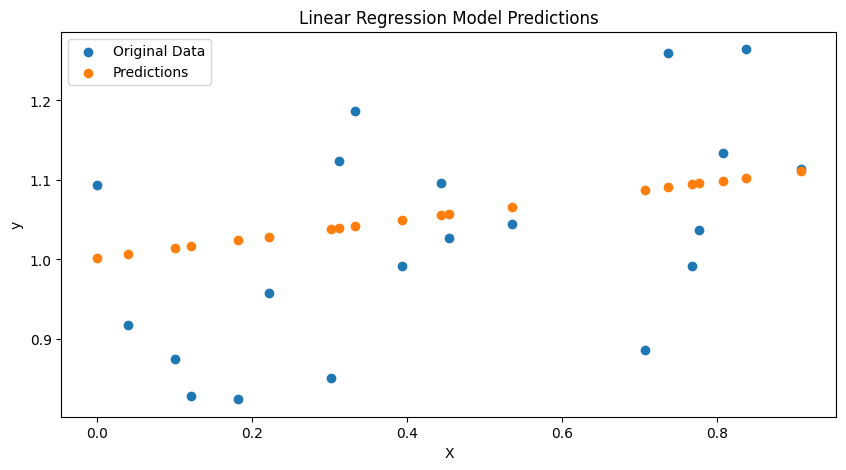

In [84]:
# Plot the predictions (these may need to be on a specific device)
plt.figure(figsize=(10, 5))
plt.scatter(X_test.cpu().numpy(), y_test.cpu().numpy(), label='Original Data')
plt.scatter(X_test.cpu().numpy(), predictions, label='Predictions')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Linear Regression Model Predictions')
plt.legend()
plt.show()

## Explanation:
Predictions were made with the trained model on the test data, and a graph was generated to visualize these predictions against the original training and testing data. The predictions appear approximately straight along the x-axis, while the original data points are scattered above or below it randomly. This suggests that the model's predictions are consistent with the linear trend of the data but may have some variance due to noise or model imperfections.

<font color="red"> Exercise 14. Save your trained model's `state_dict()` to file. [1 Mark]</font>
  * Create a new instance of your model class you made in 2. and load in the `state_dict()` you just saved to it.
  * Perform predictions on your test data with the loaded model and confirm they match the original model predictions from 4.

In [86]:
from pathlib import Path

# 1. Create models directory
models_dir = Path("models")
models_dir.mkdir(parents=True, exist_ok=True)

# 2. Create model save path
model_save_path = models_dir / "linear_regression_model_state_dict.pth"
# 3. Save the model state dict
torch.save(model.state_dict(), model_save_path)

In [87]:
# Create new instance of model and load saved state dict (make sure to put it on the target device)
new_model = LinearRegressionModel()
new_model.load_state_dict(torch.load(model_save_path))

<All keys matched successfully>

In [89]:
# Make predictions with loaded model and compare them to the previous
with torch.no_grad():
    new_model.eval()
    new_predictions = new_model(X_test)

# Compare predictions with the original model
print(torch.allclose(new_predictions, model(X_test)))


True


## Explanation:
The trained model's `state_dict()` was saved to a file. Then, a new instance of the model class was created, and the saved `state_dict()` was loaded into it. Predictions were made on the test data using both the original and loaded models, and it was confirmed that they match, resulting in the output `True`. This critical analysis confirms that the model's state was successfully saved and loaded, and the loaded model performs identically to the original model, demonstrating the correctness of the saving and loading process.

# Section 3. Generative models

## Some imports and utility functions

In [ ]:
# Imports
import torch
import random

import numpy as np
import matplotlib.pylab as plt

import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader

import torchvision
from torchvision import datasets, transforms

from tqdm.notebook import tqdm, trange

In [ ]:
# Some utility functions (you do not need to go through them)

def set_seed(seed=None, seed_torch=True):
  """
  Function that controls randomness. NumPy and random modules must be imported.

  Args:
    seed : Integer
      A non-negative integer that defines the random state. Default is `None`.
    seed_torch : Boolean
      If `True` sets the random seed for pytorch tensors, so pytorch module
      must be imported. Default is `True`.

  Returns:
    Nothing.
  """
  if seed is None:
    seed = np.random.choice(2 ** 32)
  random.seed(seed)
  np.random.seed(seed)
  if seed_torch:
    torch.manual_seed(seed)
    torch.cuda.manual_seed_all(seed)
    torch.cuda.manual_seed(seed)
    torch.backends.cudnn.benchmark = False
    torch.backends.cudnn.deterministic = True

  print(f'Random seed {seed} has been set.')


def seed_worker(worker_id):
  """
  DataLoader will reseed workers following randomness in
  multi-process data loading algorithm.

  Args:
    worker_id: integer
      ID of subprocess to seed. 0 means that
      the data will be loaded in the main process
      Refer: https://pytorch.org/docs/stable/data.html#data-loading-randomness for more details

  Returns:
    Nothing
  """
  worker_seed = torch.initial_seed() % 2**32
  np.random.seed(worker_seed)
  random.seed(worker_seed)


def set_device():
  """
  Set the device. CUDA if available, CPU otherwise

  Args:
    None

  Returns:
    Nothing
  """
  device = "cuda" if torch.cuda.is_available() else "cpu"
  if device != "cuda":
    print("WARNING: For this notebook to perform best, "
        "if possible, in the menu under `Runtime` -> "
        "`Change runtime type.`  select `GPU` ")
  else:
    print("GPU is enabled in this notebook.")

  return device

def plot_gen_samples_ppca(therm1, therm2, therm_data_sim):
  """
  Plotting generated samples

  Args:
    therm1: list
      Thermometer 1
    them2: list
      Thermometer 2
    therm_data_sim: list
      Generated (simulate, draw) `n_samples` from pPCA model

  Returns:
    Nothing
  """
  plt.plot(therm1, therm2, '.', c='c', label='training data')
  plt.plot(therm_data_sim[0], therm_data_sim[1], '.', c='m', label='"generated" data')
  plt.axis('equal')
  plt.xlabel('Thermometer 1 ($^\circ$C)')
  plt.ylabel('Thermometer 2 ($^\circ$C)')
  plt.legend()
  plt.show()


def plot_linear_ae(lin_losses):
  """
  Plotting linear autoencoder

  Args:
    lin_losses: list
      Log of linear autoencoder MSE losses

  Returns:
    Nothing
  """
  plt.figure()
  plt.plot(lin_losses)
  plt.ylim([0, 2*torch.as_tensor(lin_losses).median()])
  plt.xlabel('Training batch')
  plt.ylabel('MSE Loss')
  plt.show()


def get_data(name='mnist'):
  """
  Get data

  Args:
    name: string
      Name of the dataset

  Returns:
    my_dataset: dataset instance
      Instance of dataset
    my_dataset_name: string
      Name of the dataset
    my_dataset_shape: tuple
      Shape of dataset
    my_dataset_size: int
      Size of dataset
    my_valset: torch.loader
      Validation loader
  """
  if name == 'mnist':
    my_dataset_name = "MNIST"
    my_dataset = mnist
    my_valset = mnist_val
    my_dataset_shape = (1, 28, 28)
    my_dataset_size = 28 * 28
  elif name == 'cifar10':
    my_dataset_name = "CIFAR10"
    my_dataset = cifar10
    my_valset = cifar10_val
    my_dataset_shape = (3, 32, 32)
    my_dataset_size = 3 * 32 * 32

  return my_dataset, my_dataset_name, my_dataset_shape, my_dataset_size, my_valset


def image_moments(image_batches, n_batches=None):
  """
  Compute mean and covariance of all pixels
  from batches of images

  Args:
    Image_batches: tuple
      Image batches
    n_batches: int
      Number of Batch size

  Returns:
    m1: float
      Mean of all pixels
    cov: float
      Covariance of all pixels
  """
  m1, m2 = torch.zeros((), device=DEVICE), torch.zeros((), device=DEVICE)
  n = 0
  for im in tqdm(image_batches, total=n_batches, leave=False,
                 desc='Computing pixel mean and covariance...'):
    im = im.to(DEVICE)
    b = im.size()[0]
    im = im.view(b, -1)
    m1 = m1 + im.sum(dim=0)
    m2 = m2 + (im.view(b,-1,1) * im.view(b,1,-1)).sum(dim=0)
    n += b
  m1, m2 = m1/n, m2/n
  cov = m2 - m1.view(-1,1)*m1.view(1,-1)
  return m1.cpu(), cov.cpu()


def pca_encoder_decoder(mu, cov, k):
  """
  Compute encoder and decoder matrices
  for PCA dimensionality reduction

  Args:
    mu: np.ndarray
      Mean
    cov: float
      Covariance
    k: int
      Dimensionality

  Returns:
    Nothing
  """
  mu = mu.view(1,-1)
  u, s, v = torch.svd_lowrank(cov, q=k)
  W_encode = v / torch.sqrt(s)
  W_decode = u * torch.sqrt(s)

  def pca_encode(x):
    """
    Encoder: Subtract mean image and
    project onto top K eigenvectors of
    the data covariance

    Args:
      x: torch.tensor
        Input data

    Returns:
      PCA Encoding
    """
    return (x.view(-1,mu.numel()) - mu) @ W_encode

  def pca_decode(h):
    """
    Decoder: un-project then add back in the mean

    Args:
      h: torch.tensor
        Hidden layer data

    Returns:
      PCA Decoding
    """
    return (h @ W_decode.T) + mu

  return pca_encode, pca_decode


def cout(x, layer):
  """
  Unnecessarily complicated but complete way to
  calculate the output depth, height
  and width size for a Conv2D layer

  Args:
    x: tuple
      Input size (depth, height, width)
    layer: nn.Conv2d
      The Conv2D layer

  Returns:
    Tuple of out-depth/out-height and out-width
    Output shape as given in [Ref]
    Ref:
    https://pytorch.org/docs/stable/generated/torch.nn.Conv2d.html
  """
  assert isinstance(layer, nn.Conv2d)
  p = layer.padding if isinstance(layer.padding, tuple) else (layer.padding,)
  k = layer.kernel_size if isinstance(layer.kernel_size, tuple) else (layer.kernel_size,)
  d = layer.dilation if isinstance(layer.dilation, tuple) else (layer.dilation,)
  s = layer.stride if isinstance(layer.stride, tuple) else (layer.stride,)
  in_depth, in_height, in_width = x
  out_depth = layer.out_channels
  out_height = 1 + (in_height + 2 * p[0] - (k[0] - 1) * d[0] - 1) // s[0]
  out_width = 1 + (in_width + 2 * p[-1] - (k[-1] - 1) * d[-1] - 1) // s[-1]
  return (out_depth, out_height, out_width)


def plot_torch_image(image, ax=None):
  """
  Helper function to plot torch image

  Args:
    image: torch.tensor
      Image
    ax: plt object
      If None, plt.gca()

  Returns:
    Nothing
  """
  ax = ax if ax is not None else plt.gca()
  c, h, w = image.size()
  if c==1:
    cm = 'gray'
  else:
    cm = None

  # Torch images have shape (channels, height, width)
  # but matplotlib expects
  # (height, width, channels) or just
  # (height,width) when grayscale
  im_plt = torch.clip(image.detach().cpu().permute(1,2,0).squeeze(), 0.0, 1.0)
  ax.imshow(im_plt, cmap=cm)
  ax.set_xticks([])
  ax.set_yticks([])
  ax.spines['right'].set_visible(False)
  ax.spines['top'].set_visible(False)


def plot_images(images, h=3, w=3, plt_title=''):
  """
  Helper function to plot images

  Args:
    images: torch.tensor
      Images
    h: int
      Image height
    w: int
      Image width
    plt_title: string
      Plot title

  Returns:
    Nothing
  """
  plt.figure(figsize=(h*2, w*2))
  plt.suptitle(plt_title, y=1.03)
  for i in range(h*w):
    plt.subplot(h, w, i + 1)
    plot_torch_image(images[i])
  plt.axis('off')
  plt.show()


def plot_conv_ae(lin_losses, conv_losses):
  """
  Plotting convolutional autoencoder

  Args:
    lin_losses: list
      Log of linear autoencoder MSE losses
    conv_losses: list
      Log of convolutional model MSe losses

  Returns:
    Nothing
  """
  plt.figure()
  plt.plot(lin_losses)
  plt.plot(conv_losses)
  plt.legend(['Lin AE', 'Conv AE'])
  plt.xlabel('Training batch')
  plt.ylabel('MSE Loss')
  plt.ylim([0,
            2*max(torch.as_tensor(conv_losses).median(),
                  torch.as_tensor(lin_losses).median())])
  plt.show()

In [ ]:
SEED = 0
set_seed(seed=SEED)
DEVICE = set_device()

## Section 3.1: Latent Variable Models

Assume we have two noisy thermometers measuring the temperature of the same room. They both make noisy measurements.  The room tends to be around 25&deg;C (that's 77&deg;F), but can vary around that temperature.  If we take lots of readings from the two thermometers over time and plot the paired readings, we might see something like the plot generated below:

In [ ]:
# Generate example datapoints from the two thermometers
def generate_data(n_samples, mean_of_temps, cov_of_temps, seed):
  """
  Generate random data, normally distributed

  Args:
    n_samples : int
      The number of samples to be generated
    mean_of_temps : numpy.ndarray
      1D array with the mean of temparatures, Kx1
    cov_of_temps : numpy.ndarray
      2D array with the covariance, , KxK
    seed : int
      Set random seed for the psudo random generator

  Returns:
    therm1 : numpy.ndarray
      Thermometer 1
    therm2 : numpy.ndarray
      Thermometer 2
  """

  np.random.seed(seed)
  therm1, therm2 = np.random.multivariate_normal(mean_of_temps,
                                                cov_of_temps,
                                                n_samples).T
  return therm1, therm2


n_samples = 2000
mean_of_temps = np.array([25, 25])
cov_of_temps = np.array([[10, 5], [5, 10]])
therm1, therm2 = generate_data(n_samples, mean_of_temps, cov_of_temps, seed=SEED)

plt.plot(therm1, therm2, '.')
plt.axis('equal')
plt.xlabel('Thermometer 1 ($^\circ$C)')
plt.ylabel('Thermometer 2 ($^\circ$C)')
plt.show()

Let’s model these data with a single principal component. Given that the thermometers are measuring the same actual temperature, the principal component axes will be the identity line. The direction of this axes can be indicated by the unit vector $[1 ~~ 1]~/~\sqrt2$.  We could estimate this axes by applying PCA. We can plot this axes, it tells us something about the data, but we can’t generate from it:

In [ ]:
# Add first PC axes to the plot
plt.plot(therm1, therm2, '.')
plt.axis('equal')
plt.xlabel('Thermometer 1 ($^\circ$C)')
plt.ylabel('Thermometer 2 ($^\circ$C)')
plt.plot([plt.axis()[0], plt.axis()[1]],
         [plt.axis()[0], plt.axis()[1]])
plt.show()

**Step 1:** Calculate the parameters of the pPCA model

This part is completed already, so you don't need to make any edits:

In [ ]:
# Project Data onto the principal component axes.
# We could have "learned" this from the data by applying PCA,
# but we "know" the value from the problem definition.
pc_axes = np.array([1.0, 1.0]) / np.sqrt(2.0)

# Thermometers data
therm_data = np.array([therm1, therm2])

# Zero center the data
therm_data_mean = np.mean(therm_data, 1)
therm_data_center = np.outer(therm_data_mean, np.ones(therm_data.shape[1]))
therm_data_zero_centered = therm_data - therm_data_center

# Calculate the variance of the projection on the PC axes
pc_projection = np.matmul(pc_axes, therm_data_zero_centered);
pc_axes_variance = np.var(pc_projection)

# Calculate the residual variance (variance not accounted for by projection on the PC axes)
sensor_noise_std = np.mean(np.linalg.norm(therm_data_zero_centered - np.outer(pc_axes, pc_projection), axis=0, ord=2))
sensor_noise_var = sensor_noise_std **2

**Step 2**: "Generate" from the pPCA model of the thermometer data.

Complete the code so we generate data by sampling according to the pPCA model:

\begin{equation}
x = \mu + W z + \epsilon, \,\text{where}\,~~ \epsilon \sim \text{Normal}(0,~\sigma^2 \mathbf{I})
\end{equation}

In [ ]:
def gen_from_pPCA(noise_var, data_mean, pc_axes, pc_variance):
  """
  Generate samples from pPCA

  Args:
    noise_var: np.ndarray
      Sensor noise variance
    data_mean: np.ndarray
      Thermometer data mean
    pc_axes: np.ndarray
      Principal component axes
    pc_variance: np.ndarray
      The variance of the projection on the PC axes

  Returns:
    therm_data_sim: np.ndarray
      Generated (simulate, draw) `n_samples` from pPCA model
  """
  # We are matching this value to the thermometer data so the visualizations look similar
  n_samples = 1000

  # Randomly sample from z (latent space value)
  z = np.random.normal(0.0, np.sqrt(pc_variance), n_samples)

  # Sensor noise covariance matrix (∑)
  epsilon_cov = [[noise_var, 0.0], [0.0, noise_var]]

  # Data mean reshaped for the generation
  sim_mean = np.outer(data_mean, np.ones(n_samples))

  # Draw `n_samples` from `np.random.multivariate_normal`
  rand_eps = np.random.multivariate_normal([0.0, 0.0], epsilon_cov, n_samples)
  rand_eps = rand_eps.T

  # Generate (simulate, draw) `n_samples` from pPCA model
  therm_data_sim = sim_mean + np.outer(pc_axes, z) + rand_eps

  return therm_data_sim

therm_data_sim = gen_from_pPCA(sensor_noise_var, therm_data_mean, pc_axes, pc_axes_variance)
plot_gen_samples_ppca(therm1, therm2, therm_data_sim)

## Section 3.2: Autoencoders

In [ ]:
# Download MNIST and CIFAR10 datasets
import tarfile, requests, os

fname = 'MNIST.tar.gz'
name = 'mnist'
url = 'https://osf.io/y2fj6/download'

if not os.path.exists(name):
  print('\nDownloading MNIST dataset...')
  r = requests.get(url, allow_redirects=True)
  with open(fname, 'wb') as fh:
    fh.write(r.content)
  print('\nDownloading MNIST completed!\n')

if not os.path.exists(name):
  with tarfile.open(fname) as tar:
    tar.extractall(name)
    os.remove(fname)
else:
  print('MNIST dataset has been downloaded.\n')


fname = 'cifar-10-python.tar.gz'
name = 'cifar10'
url = 'https://osf.io/jbpme/download'

if not os.path.exists(name):
  print('\nDownloading CIFAR10 dataset...')
  r = requests.get(url, allow_redirects=True)
  with open(fname, 'wb') as fh:
    fh.write(r.content)
  print('\nDownloading CIFAR10 completed!')

if not os.path.exists(name):
  with tarfile.open(fname) as tar:
    tar.extractall(name)
    os.remove(fname)
else:
  print('CIFAR10 dataset has been dowloaded.')

In [ ]:
# Load MNIST and CIFAR10 image datasets

# MNIST
mnist = datasets.MNIST('./mnist/',
                       train=True,
                       transform=transforms.ToTensor(),
                       download=False)
mnist_val = datasets.MNIST('./mnist/',
                           train=False,
                           transform=transforms.ToTensor(),
                           download=False)

# CIFAR 10
cifar10 = datasets.CIFAR10('./cifar10/',
                           train=True,
                           transform=transforms.ToTensor(),
                           download=False)
cifar10_val = datasets.CIFAR10('./cifar10/',
                               train=False,
                               transform=transforms.ToTensor(),
                               download=False)

### Select a dataset

We've built today's tutorial to be flexible. It should work more-or-less out of the box with both MNIST and CIFAR (and other image datasets). MNIST is in many ways simpler, and the results will likely look better and run a bit faster if using MNIST. But we are leaving it up to you to pick which one you want to experiment with!

We encourage pods to coordinate so that some members use MNIST and others use CIFAR10. Keep in mind that the CIFAR dataset may require more learning epochs (longer training required).

Change the variable `dataset_name` below to pick your dataset.


In [ ]:
dataset_name = 'mnist'  # This can be mnist or cifar10
train_set, dataset_name, data_shape, data_size, valid_set = get_data(name=dataset_name)

### Conceptual introduction to AutoEncoders

Now we'll create our first autoencoder. It will reduce images down to $K$ dimensions. The architecture will be quite simple: the input will be linearly mapped to a single hidden (or latent) layer $\mathbf{h}$ with $K$ units, which will then be linearly mapped back to an output that is the same size as the input:

\begin{equation}
\mathbf{x} \longrightarrow \mathbf{h} \longrightarrow \mathbf{x'}
\end{equation}

The loss function we'll use will simply be mean squared error (MSE) quantifying how well the reconstruction ($\mathbf{x'}$) matches the original image ($\mathbf{x}$):

\begin{equation}
\text{MSE Loss} = \sum_{i=1}^{N} ||\mathbf{x}_i - \mathbf{x'}_i||^2_2
\end{equation}

If all goes well, then the AutoEncoder will learn, **end to end**, a good "encoding" or "compression" of inputs to a latent representation ($\mathbf{x \longrightarrow h}$) as well as a good "decoding" of that latent representation to a reconstruction of the original input ($\mathbf{h \longrightarrow x'}$).

We first need to choose our desired dimensionality of $\mathbf{h}$. We'll see more on this below, but for MNIST, 5 to 20 is plenty. For CIFAR, we need more like 50 to 100 dimensions.

Coordinate with your pod to try a variety of values for $K$ in each dataset so you can compare results.

### Linear AutoEncoder Architecture

Complete the missing parts of the `LinearAutoEncoder` class.

The `LinearAutoEncoder` as two stages: an `encoder` which linearly maps from inputs of size `x_dim = my_dataset_dim` to a hidden layer of size `h_dim = K` (with no nonlinearity), and a `decoder` which maps back from `K` up to the number of pixels in each image.

In [ ]:
# Run to define the `train_autoencoder` function.
# Feel free to inspect the training function if the time allows.

def train_autoencoder(autoencoder, dataset, device, epochs=20, batch_size=250,
                      seed=0):
  """
  Function to train autoencoder

  Args:
    autoencoder: nn.module
      Autoencoder instance
    dataset: function
      Dataset
    device: string
      GPU if available. CPU otherwise
    epochs: int
      Number of epochs [default: 20]
    batch_size: int
      Batch size
    seed: int
      Set seed for reproducibility; [default: 0]

  Returns:
    mse_loss: float
      MSE Loss
  """
  autoencoder.to(device)
  optim = torch.optim.Adam(autoencoder.parameters(),
                           lr=1e-3,
                           weight_decay=1e-5)
  loss_fn = nn.MSELoss()
  g_seed = torch.Generator()
  g_seed.manual_seed(seed)
  loader = DataLoader(dataset,
                      batch_size=batch_size,
                      shuffle=True,
                      pin_memory=True,
                      num_workers=2,
                      worker_init_fn=seed_worker,
                      generator=g_seed)

  mse_loss = torch.zeros(epochs * len(dataset) // batch_size, device=device)
  i = 0
  for epoch in trange(epochs, desc='Epoch'):
    for im_batch, _ in loader:
      im_batch = im_batch.to(device)
      optim.zero_grad()
      reconstruction = autoencoder(im_batch)
      # Loss calculation
      loss = loss_fn(reconstruction.view(batch_size, -1),
                     target=im_batch.view(batch_size, -1))
      loss.backward()
      optim.step()

      mse_loss[i] = loss.detach()
      i += 1
  # After training completes,
  # make sure the model is on CPU so we can easily
  # do more visualizations and demos.
  autoencoder.to('cpu')
  return mse_loss.cpu()

In [ ]:
class LinearAutoEncoder(nn.Module):
  """
  Linear Autoencoder
  """

  def __init__(self, x_dim, h_dim):
    """
    A Linear AutoEncoder

    Args:
      x_dim: int
        Input dimension
      h_dim: int
        Hidden dimension, bottleneck dimension, K

    Returns:
      Nothing
    """
    super().__init__()
    # Encoder layer (a linear mapping from x_dim to K)
    self.enc_lin = nn.Linear(x_dim, h_dim)
    # Decoder layer (a linear mapping from K to x_dim)
    self.dec_lin = nn.Linear(h_dim, x_dim)

  def encode(self, x):
    """
    Encoder function

    Args:
      x: torch.tensor
        Input features

    Returns:
      x: torch.tensor
        Encoded output
    """
    h = self.enc_lin(x)
    return h

  def decode(self, h):
    """
    Decoder function

    Args:
      h: torch.tensor
        Encoded output

    Returns:
      x_prime: torch.tensor
        Decoded output
    """
    x_prime = self.dec_lin(h)
    return x_prime

  def forward(self, x):
    """
    Forward pass

    Args:
      x: torch.tensor
        Input data

    Returns:
      Decoded output
    """
    flat_x = x.view(x.size(0), -1)
    h = self.encode(flat_x)
    return self.decode(h).view(x.size())

In [ ]:
# Pick your own K
K = 20
lin_ae = LinearAutoEncoder(data_size, K)
lin_losses = train_autoencoder(lin_ae, train_set, device=DEVICE, seed=SEED)
plot_linear_ae(lin_losses)

### Comparison to PCA

One way to think about AutoEncoders is as a form of dimensionality-reduction. The dimensionality of $\mathbf{h}$ is much smaller than the dimensionality of $\mathbf{x}$.

Another common technique for dimensionality reduction is to project data onto the top $K$ **principal components** (Principal Component Analysis or PCA). For comparison, let's also apply PCA for dimensionality reduction. The following cell will do this using the same value of K as you chose for the linear autoencoder.

In [ ]:
# PCA requires finding the top K eigenvectors of the data covariance. Start by
# finding the mean and covariance of the pixels in our dataset
g_seed = torch.Generator()
g_seed.manual_seed(SEED)

loader = DataLoader(train_set,
                    batch_size=32,
                    pin_memory=True,
                    num_workers=2,
                    worker_init_fn=seed_worker,
                    generator=g_seed)

mu, cov = image_moments((im for im, _ in loader),
                        n_batches=len(train_set) // 32)

pca_encode, pca_decode = pca_encoder_decoder(mu, cov, K)

Let's visualize some of the reconstructions ($\mathbf{x'}$) side-by-side with the input images ($\mathbf{x}$).

In [ ]:
# Visualize the reconstructions $\mathbf{x}'$, run this code a few times to see different examples.

n_plot = 7
plt.figure(figsize=(10, 4.5))
for i in range(n_plot):
  idx = torch.randint(len(train_set), size=())
  image, _ = train_set[idx]
  # Get reconstructed image from autoencoder
  with torch.no_grad():
    reconstruction = lin_ae(image.unsqueeze(0)).reshape(image.size())

  # Get reconstruction from PCA dimensionality reduction
  h_pca = pca_encode(image)
  recon_pca = pca_decode(h_pca).reshape(image.size())

  plt.subplot(3, n_plot, i + 1)
  plot_torch_image(image)
  if i == 0:
    plt.ylabel('Original\nImage')

  plt.subplot(3, n_plot, i + 1 + n_plot)
  plot_torch_image(reconstruction)
  if i == 0:
    plt.ylabel(f'Lin AE\n(K={K})')

  plt.subplot(3, n_plot, i + 1 + 2*n_plot)
  plot_torch_image(recon_pca)
  if i == 0:
    plt.ylabel(f'PCA\n(K={K})')
plt.show()

### PCA vs. Linear autoenconder

Compare the PCA-based reconstructions to those from the linear autoencoder. Is one better than the other? Are they equally good? Equally bad?

Try out the above cells with a couple values of K if possible. How does the choice of $K$ impact reconstruction quality?

In [ ]:
# try to run PCA and linear autoencoder with different values of K

> You may find that a linear autoencoder is a very similar set-up to PCA - remember from the lecture that both will find solutions on the same linear subspace.

> Lower values of K result in worse reconstruction quality using both the linear autoencoder and PCA - this is because the images are being squished through a smaller bottleneck so more information is lost! If K = 5, each image is represented by just 5 numbers at that bottleneck, instead of by the number of pixels there are (784 for mnist)!

> I think it's pretty impressive that the reconstructions are as good as they are.

### Building a nonlinear convolutional autoencoder

Ok so we have linear autoencoders doing about the same thing as PCA. We want to improve on that though! We can do so by adding nonlinearity and convolutions.

**Nonlinear:** We'd like to apply autoencoders to learn a more flexible nonlinear mapping between the latent space and the images. Such a mapping can provide a more "expressive" model that better describes the image data than a linear mapping. This can be achieved by adding nonlinear activation functions to our encoder and decoder!

**Convolutional:** As you saw on the day dedicated to RNNs and CNNs, parameter sharing is often a good idea for images! It's quite common to use convolutional layers in autoencoders to share parameters across locations in the image.

**Side Note:** The `nn.Linear` layer (used in the linear autoencoder above) has a "bias" term, which is a learnable offset parameter separate for each output unit. Just like PCA "centers" the data by subtracting off the mean image (`mu`) before encoding and adds the average back in during decoding, a bias term in the decoder can effectively account for the first moment (mean) of the data (i.e. the average of all images in the training set). Convolution layers do have bias parameters, but the bias is applied per filter rather than per pixel location. If we're generating grayscale images (like those in MNIST), then `Conv2d` will learn only one bias across the entire image.

For some conceptual continuity with both PCA and the `nn.Linear` layers above, the next block defines a custom `BiasLayer` for adding a learnable per-pixel offset. This custom layer will be used twice: as the first stage of the encoder and as the final stage of the decoder. Ideally, this means that the rest of the neural net can focus on fitting more interesting fine-grained structure.

In [ ]:
class BiasLayer(nn.Module):
  """
  Bias Layer
  """

  def __init__(self, shape):
    """
    Initialise parameters of bias layer

    Args:
      shape: tuple
        Requisite shape of bias layer

    Returns:
      Nothing
    """
    super(BiasLayer, self).__init__()
    init_bias = torch.zeros(shape)
    self.bias = nn.Parameter(init_bias, requires_grad=True)

  def forward(self, x):
    """
    Forward pass

    Args:
      x: torch.tensor
        Input features

    Returns:
      Output of bias layer
    """
    return x + self.bias

With that out of the way, we will next define a **nonlinear** and **convolutional** autoencoder. Here's a quick tour of the architecture:

1. The **encoder** once again maps from images to $\mathbf{h}\in\mathbb{R}^K$. This will use a `BiasLayer` followed by two convolutional layers (`nn.Conv2D`), followed by flattening and linearly projecting down to $K$ dimensions. The convolutional layers will have `ReLU` nonlinearities on their outputs.
1. The **decoder** inverts this process, taking in vectors of length $K$ and outputting images. Roughly speaking, its architecture is a "mirror image" of the encoder: the first decoder layer is linear, followed by two **deconvolution** layers ([`ConvTranspose2d`](https://pytorch.org/docs/stable/generated/torch.nn.ConvTranspose2d.html)). The `ConvTranspose2d`layers will have `ReLU` nonlinearities on their _inputs_. This "mirror image" between the encoder and decoder is a useful and near-ubiquitous convention. The idea is that the decoder can then learn to approximately invert the encoder, but it is not a strict requirement (and it does not guarantee the decoder will be an exact inverse of the encoder!).

Below is a schematic of the architecture for MNIST. Notice that the width and height dimensions of the image planes reduce after each `nn.Conv2d` and increase after each `nn.ConvTranspose2d`. With CIFAR10, the architecture is the same but the exact sizes will differ.

<img src="https://raw.githubusercontent.com/NeuromatchAcademy/course-content-dl/main/tutorials/W2D4_GenerativeModels/static/conv_sizes.png">

[`torch.nn.ConvTranspose2d`](https://pytorch.org/docs/stable/generated/torch.nn.ConvTranspose2d.html) module can be seen as the gradient of `Conv2d` with respect to its input. It is also known as a fractionally-strided convolution or a deconvolution (although it is not an actual deconvolution operation). The following code demonstrates this change in sizes:

In [ ]:
dummy_image = torch.rand(data_shape).unsqueeze(0)
in_channels = data_shape[0]
out_channels = 7

dummy_conv = nn.Conv2d(in_channels=in_channels,
                       out_channels=out_channels,
                       kernel_size=5)

dummy_deconv = nn.ConvTranspose2d(in_channels=out_channels,
                                  out_channels=in_channels,
                                  kernel_size=5)

print(f'Size of image is {dummy_image.shape}')
print(f'Size of Conv2D(image) {dummy_conv(dummy_image).shape}')
print(f'Size of ConvTranspose2D(Conv2D(image)) {dummy_deconv(dummy_conv(dummy_image)).shape}')

The `ConvAutoEncoder` class: we use the helper function `cout(torch.Tensor, nn.Conv2D)` to calculate the output shape of a [`nn.Conv2D`](https://pytorch.org/docs/stable/generated/torch.nn.Conv2d.html) layer given a tensor with shape (channels, height, width).

It will use the value for **K** you defined in Coding Exercise 3.1 as we will eventually compare the results of the linear autoencoder that you trained there with this one. To play around with K, change it there and retrain both the linear autoencoder and the convolutional autoencoders.

**Do you expect the convolutional autoencoder or the linear autoencoder to reach a lower value of mean squared error (MSE)?**

In [ ]:
class ConvAutoEncoder(nn.Module):
  """
  A Convolutional AutoEncoder
  """

  def __init__(self, x_dim, h_dim, n_filters=32, filter_size=5):
    """
    Initialize parameters of ConvAutoEncoder

    Args:
      x_dim: tuple
        Input dimensions (channels, height, widths)
      h_dim: int
        Hidden dimension, bottleneck dimension, K
      n_filters: int
        Number of filters (number of output channels)
      filter_size: int
        Kernel size

    Returns:
      Nothing
    """
    super().__init__()
    channels, height, widths = x_dim

    # Encoder input bias layer
    self.enc_bias = BiasLayer(x_dim)

    # First encoder conv2d layer
    self.enc_conv_1 = nn.Conv2d(channels, n_filters, filter_size)

    # Output shape of the first encoder conv2d layer given x_dim input
    conv_1_shape = cout(x_dim, self.enc_conv_1)

    # Second encoder conv2d layer
    self.enc_conv_2 = nn.Conv2d(n_filters, n_filters, filter_size)

    # Output shape of the second encoder conv2d layer given conv_1_shape input
    conv_2_shape = cout(conv_1_shape, self.enc_conv_2)

    # The bottleneck is a dense layer, therefore we need a flattenning layer
    self.enc_flatten = nn.Flatten()

    # Conv output shape is (depth, height, width), so the flatten size is:
    flat_after_conv = conv_2_shape[0] * conv_2_shape[1] * conv_2_shape[2]

    # Encoder Linear layer
    self.enc_lin = nn.Linear(flat_after_conv, h_dim)

    # Decoder Linear layer
    self.dec_lin = nn.Linear(h_dim, flat_after_conv)

    # Unflatten data to (depth, height, width) shape
    self.dec_unflatten = nn.Unflatten(dim=-1, unflattened_size=conv_2_shape)

    # First "deconvolution" layer
    self.dec_deconv_1 = nn.ConvTranspose2d(n_filters, n_filters, filter_size)

    # Second "deconvolution" layer
    self.dec_deconv_2 = nn.ConvTranspose2d(n_filters, channels, filter_size)

    # Decoder output bias layer
    self.dec_bias = BiasLayer(x_dim)

  def encode(self, x):
    """
    Encoder

    Args:
      x: torch.tensor
        Input features

    Returns:
      h: torch.tensor
        Encoded output
    """
    s = self.enc_bias(x)
    s = F.relu(self.enc_conv_1(s))
    s = F.relu(self.enc_conv_2(s))
    s = self.enc_flatten(s)
    h = self.enc_lin(s)
    return h

  def decode(self, h):
    """
    Decoder

    Args:
      h: torch.tensor
        Encoded output

    Returns:
      x_prime: torch.tensor
        Decoded output
    """
    s = F.relu(self.dec_lin(h))
    s = self.dec_unflatten(s)
    s = F.relu(self.dec_deconv_1(s))
    s = self.dec_deconv_2(s)
    x_prime = self.dec_bias(s)
    return x_prime

  def forward(self, x):
    """
    Forward pass

    Args:
      x: torch.tensor
        Input features

    Returns:
      Decoded output
    """
    return self.decode(self.encode(x))

In [ ]:
trained_conv_AE = ConvAutoEncoder(data_shape, K)
assert trained_conv_AE.encode(train_set[0][0].unsqueeze(0)).numel() == K, "Encoder output size should be K!"
conv_losses = train_autoencoder(trained_conv_AE, train_set, device=DEVICE, seed=SEED)
plot_conv_ae(lin_losses, conv_losses)

You should see that the `ConvAutoEncoder` achieved lower MSE loss than the linear one. If not, you may need to retrain it (or run another few training epochs from where it left off). We make fewer guarantees on this working with CIFAR10, but it should definitely work with MNIST.

Now let's visually compare the reconstructed images from the linear and nonlinear autoencoders. Keep in mind that both have the same dimensionality for $\mathbf{h}$!

In [ ]:
# Visualize the linear and nonlinear AE outputs
if lin_ae.enc_lin.out_features != trained_conv_AE.enc_lin.out_features:
   raise ValueError('ERROR: your linear and convolutional autoencoders have different values of K')

n_plot = 7
plt.figure(figsize=(10, 4.5))
for i in range(n_plot):
  idx = torch.randint(len(train_set), size=())
  image, _ = train_set[idx]
  with torch.no_grad():
    # Get reconstructed image from linear autoencoder
    lin_recon = lin_ae(image.unsqueeze(0))[0]

    # Get reconstruction from deep (nonlinear) autoencoder
    nonlin_recon = trained_conv_AE(image.unsqueeze(0))[0]

  plt.subplot(3, n_plot, i+1)
  plot_torch_image(image)
  if i == 0:
    plt.ylabel('Original\nImage')

  plt.subplot(3, n_plot, i + 1 + n_plot)
  plot_torch_image(lin_recon)
  if i == 0:
    plt.ylabel(f'Lin AE\n(K={K})')

  plt.subplot(3, n_plot, i + 1 + 2*n_plot)
  plot_torch_image(nonlin_recon)
  if i == 0:
    plt.ylabel(f'NonLin AE\n(K={K})')
plt.show()

## Section 3.3: Variational Auto-Encoders (VAEs)

### Generating novel images from the decoder

If we isolate the decoder part of the AutoEncoder, what we have is a neural network that takes as input a vector of size $K$ and produces as output an image that looks something like our training data. Recall that in our earlier notation, we had an input $\mathbf{x}$ that was mapped to a low-dimensional hidden representation $\mathbf{h}$ which was then decoded into a reconstruction of the input, $\mathbf{x'}$:

\begin{equation}
\mathbf{x} \overset{\text{encode}}{\longrightarrow} \mathbf{h} \overset{\text{decode}}{\longrightarrow} \mathbf{x'}\, .
\end{equation}

Partly as a matter of convention, and partly to distinguish where we are going next from the previous section, we're going to introduce a new variable, $\mathbf{z} \in \mathbb{R}^K$, which will take the place of $\mathbf{h}$. The key difference is that while $\mathbf{h}$ is produced by the encoder for a particular $\mathbf{x}$, $\mathbf{z}$ will be drawn out of thin air from a prior of our choosing:

\begin{equation}
\mathbf{z} \sim p(\mathbf{z})\\ \mathbf{z} \overset{\text{decode}}{\longrightarrow} \mathbf{x}\, .
\end{equation}

(Note that it is also common convention to drop the "prime" on $\mathbf{x}$ when it is no longer being thought of as a "reconstruction").

To make this work, we need an extra loss that minimises the gap between $\mathbf{h}$ produced by encoder and $\mathbf{h}$ drawn from a prior distribution, e.g., standard Normal.

The loss function we employ here is called sliced wasserstein distance because it works on sample spaces and is usually more robust than the alternatives like KL divergence.

As sliced wasserstein distance itself is not a focus of this lecture, `batch_swd` is given

In [ ]:
def batch_swd(d1, d2, device, num_rnd_projections=1024):
    """
    Function to calculate sliced wasserstein distance

    Args:
      d1: tensor
        samples from batch_1, size of dist_num_1 x sample_num x feature_dim
      d2: tensor
        samples from batch_2, size of dist_num_2 x sample_num x feature_dim
      device: string
        GPU if available. CPU otherwise
      num_rnd_projections: int
        Number of random projections in SWD [default: 1024]

    Returns:
      swd: tensor
        SWD of d1 and d2, size of dist_num_1 x dist_num_2
    """
    projection_matrix = torch.randn(d1.size(2), num_rnd_projections).to(device)
    projection_matrix = projection_matrix/((projection_matrix**2).sum(dim=0)**0.5)

    projected1 = d1.matmul(projection_matrix)
    projected2 = d2.matmul(projection_matrix)

    projected1_sorted = torch.sort(projected1, dim=1).values.view(d1.size(0), -1)
    projected2_sorted = torch.sort(projected2, dim=1).values.view(d2.size(0), -1)

    c = projected1_sorted[:,None,:]-projected2_sorted[None,:,:]

    w2 = (c**2).mean(dim=2)

    return w2

In [ ]:
def train_autoencoder_swd(autoencoder, dataset, device, epochs=20, lmbd=1.0,
                          batch_size=250, num_rnd_projections=1024, seed=0):
  """
  Function to train autoencoder with swd

  Args:
    autoencoder: nn.module
      Autoencoder instance
    dataset: function
      Dataset
    device: string
      GPU if available. CPU otherwise
    epochs: int
      Number of epochs [default: 20]
    lmbd: float
      The weight for SWD loss [default: 1.0]
    batch_size: int
      Batch size
    num_rnd_projections: int
      Number of random projections in SWD [default: 1024]
    seed: int
      Set seed for reproducibility; [default: 0]

  Returns:
    mse_loss: float
      MSE Loss
    div_loss: float
      SWD of latent variables and standard Normal
  """
  autoencoder.to(device)
  optim = torch.optim.Adam(autoencoder.parameters(),
                           lr=1e-3,
                           weight_decay=1e-5)
  loss_fn = nn.MSELoss()
  g_seed = torch.Generator()
  g_seed.manual_seed(seed)
  loader = DataLoader(dataset,
                      batch_size=batch_size,
                      shuffle=True,
                      pin_memory=True,
                      num_workers=2,
                      worker_init_fn=seed_worker,
                      generator=g_seed)

  mse_loss = torch.zeros(epochs * len(dataset) // batch_size, device=device)
  div_loss = torch.zeros(epochs * len(dataset) // batch_size, device=device)
  i = 0
  for epoch in trange(epochs, desc='Epoch'):
    for im_batch, _ in loader:
      im_batch = im_batch.to(device)
      optim.zero_grad()
      # the original code was "reconstruction = autoencoder(im_batch)"
      # here we take the output of `encode` explicitly as we need it for
      # the computation of SWD
      latent = autoencoder.encode(im_batch)
      reconstruction = autoencoder.decode(latent)
      # Loss calculation
      loss_rec = loss_fn(reconstruction.view(batch_size, -1),
                         target=im_batch.view(batch_size, -1))
      # Since batch_swd is designed for many-to-many distance, and we have only
      # one-to-one here, we append an additional dimension ahead of latent
      # size of latent is [sample_num, feature_dim]
      # size of latent[None,:,:] becomes [1, sample_num, feature_dim]
      loss_swd = batch_swd(latent[None,:,:],
                           torch.randn_like(latent[None,:,:]),   # <-- samples from standard Normal
                           device,
                           num_rnd_projections)[0,0]
      loss = loss_rec + lmbd*loss_swd
      loss.backward()
      optim.step()

      mse_loss[i] = loss_rec.detach()
      div_loss[i] = loss_swd.detach()
      i += 1
  # After training completes,
  # make sure the model is on CPU so we can easily
  # do more visualizations and demos.
  autoencoder.to('cpu')
  return mse_loss.cpu(), div_loss.cpu()

In [ ]:
trained_conv_VAE = ConvAutoEncoder(data_shape, K)
assert trained_conv_VAE.encode(train_set[0][0].unsqueeze(0)).numel() == K, "Encoder output size should be K!"

In [ ]:
mse_losses, div_losses = train_autoencoder_swd(trained_conv_VAE, train_set, device=DEVICE, seed=SEED)

In [ ]:
plt.plot(mse_losses)
plt.plot(div_losses)
plt.legend(['Reconstruction Error', 'Distribution Divergence'])

### Generating images

Generate some images from the VAE that we trained above.

In [ ]:
def generate_images(autoencoder, K, n_images=1):
  """
  Generate n_images 'new' images from the decoder part of the given
  autoencoder.

  Args:
    autoencoder: nn.module
      Autoencoder model
    K: int
      Bottleneck dimension
    n_images: int
      Number of images

  Returns:
    x: torch.tensor
      (n_images, channels, height, width) tensor of images
  """
  # Concatenate tuples to get (n_images, channels, height, width)
  output_shape = (n_images,) + data_shape
  with torch.no_grad():
    # Sample z from a unit gaussian, pass through autoencoder.decode()
    z = torch.randn(n_images, K)
    x = autoencoder.decode(z)

    return x.reshape(output_shape)


set_seed(seed=SEED)
images = generate_images(trained_conv_AE, K, n_images=9)
plot_images(images, plt_title='Images Generated from the Conv-AE')
images = generate_images(trained_conv_VAE, K, n_images=9)
plot_images(images, plt_title='Images Generated from a Conv-Variational-AE')

### AutoEncoders vs. Variational AutoEncoders

Compare the images generated by the AutoEncoder to the images generated by the Variational AutoEncoder. You can run the code a few times to see a variety of examples.

Does one set look more like the training set (handwritten digits) than the other? What is driving this difference?

> The images generated from the VAE look far more like real handwritten digits.

> An Autoencoder accepts input, compresses it, and recreates it. On the other hand, VAEs assume that the source data has some underlying distribution and attempts to find the distribution parameters. Basically, VAEs are built to allow image generation and AEs are not, so it's not surprising that VAEs generate more realistic images!

<font color="red"> Exercise 15. Set the prior distribution of VAE to Uniform[0,1] (instead of standard Normal) and check the results  [0.5 Mark]</font>

Hint: in the `train_autoencoder_swd` function, you need to change the second parameter of `batch_swd` (as it refers to the samples from the prior distribution)

In [90]:
def train_autoencoder_swd(autoencoder, dataset, device, epochs=20, lmbd=1.0,
                          batch_size=250, num_rnd_projections=1024, seed=0):
  """
  Function to train autoencoder with swd

  Args:
    autoencoder: nn.module
      Autoencoder instance
    dataset: function
      Dataset
    device: string
      GPU if available. CPU otherwise
    epochs: int
      Number of epochs [default: 20]
    lmbd: float
      The weight for SWD loss [default: 1.0]
    batch_size: int
      Batch size
    num_rnd_projections: int
      Number of random projections in SWD [default: 1024]
    seed: int
      Set seed for reproducibility; [default: 0]

  Returns:
    mse_loss: float
      MSE Loss
    div_loss: float
      SWD of latent variables and standard Normal
  """
  autoencoder.to(device)
  optim = torch.optim.Adam(autoencoder.parameters(),
                           lr=1e-3,
                           weight_decay=1e-5)
  loss_fn = nn.MSELoss()
  g_seed = torch.Generator()
  g_seed.manual_seed(seed)
  loader = DataLoader(dataset,
                      batch_size=batch_size,
                      shuffle=True,
                      pin_memory=True,
                      num_workers=2,
                      worker_init_fn=seed_worker,
                      generator=g_seed)

  mse_loss = torch.zeros(epochs * len(dataset) // batch_size, device=device)
  div_loss = torch.zeros(epochs * len(dataset) // batch_size, device=device)
  i = 0
  for epoch in trange(epochs, desc='Epoch'):
    for im_batch, _ in loader:
      im_batch = im_batch.to(device)
      optim.zero_grad()
      # the original code was "reconstruction = autoencoder(im_batch)"
      # here we take the output of `encode` explicitly as we need it for
      # the computation of SWD
      latent = autoencoder.encode(im_batch)
      reconstruction = autoencoder.decode(latent)
      # Loss calculation
      loss_rec = loss_fn(reconstruction.view(batch_size, -1),
                         target=im_batch.view(batch_size, -1))
      # Since batch_swd is designed for many-to-many distance, and we have only
      # one-to-one here, we append an additional dimension ahead of latent
      # size of latent is [sample_num, feature_dim]
      # size of latent[None,:,:] becomes [1, sample_num, feature_dim]
      # Modify the second parameter to represent samples from Uniform[0,1] distribution
      loss_swd = batch_swd(latent[None,:,:],
                           torch.rand_like(latent),  # Uniform[0,1] samples
                           device,
                           num_rnd_projections)[0,0]
      loss = loss_rec + lmbd*loss_swd
      loss.backward()
      optim.step()

      mse_loss[i] = loss_rec.detach()
      div_loss[i] = loss_swd.detach()
      i += 1
  autoencoder.to('cpu')
  return mse_loss.cpu(), div_loss.cpu()



## Explanation:
Exercise 15 Critical Analysis:

In Exercise 15, the prior distribution of the Variational Autoencoder (VAE) was set to Uniform[0,1] instead of the standard Normal distribution. This change required modifying the second parameter of the `batch_swd` function to represent samples from a Uniform[0,1] distribution. 

This alteration impacts the training process by altering the distribution of latent variables, potentially leading to different representations learned by the VAE. The choice of prior distribution affects the model's capacity to generate realistic data samples and the quality of the learned latent space. By setting the prior to Uniform[0,1], the model might exhibit different convergence behavior and achieve different reconstruction and divergence losses compared to using a standard Normal distribution. 

Therefore, it's crucial to carefully consider the implications of changing the prior distribution in VAEs, as it can significantly influence the model's performance and the characteristics of the learned latent space.